In [124]:
import cv2
import numpy as np
from PIL import ImageGrab

class Rects:
    #wil be writen on screen
    label = []
    #whidt
    w = []
    #height
    h = []
    #position
    pt = []
    #number of themp iteration
    TemplateHash = []
    def AddRect(self,label,w,h,pt,TemplateHash):
        self.label.append(label)
        self.w.append(w)
        self.h.append(h)
        self.pt.append(pt)
        self.TemplateHash.append(TemplateHash)
    def Clean(self):
        self.label = []
        self.w = []
        self.h = []
        self.pt = []
        self.TemplateHash = []
    # clean all with Temphash = x
    def CleanTempHash(self,TemplateHash):
        LastIndex = 0
        loop = True
        IndexesToClean = []
        try:
            IndexesToClean.append(self.TemplateHash.index(TemplateHash))
            LastIndex = self.TemplateHash.index(TemplateHash)
        except:
            return
        while loop :
            try:
                IndexesToClean.append(self.TemplateHash.index(TemplateHash,LastIndex+1))
                LastIndex = self.TemplateHash.index(TemplateHash,LastIndex+1)
            except:
                break
        for index in IndexesToClean[::-1] :
            self.label.pop(index)
            self.w.pop(index)
            self.h.pop(index)
            self.pt.pop(index)
            self.TemplateHash.pop(index)
RecList = Rects()
RecList.CleanTempHash(0)
#anchor point [0]= x / [1]=y
AnchorXY = []

AnchorTemp = {
    #1 lap check was buging the algoritim and all cars start at first lap there is No Need to Chek if Its the first lap
    "RetroarchLogo": cv2.cvtColor(cv2.imread("Templates/MainAnchor/retroarchlogo.png"), cv2.COLOR_BGR2GRAY)
}


screenpil = ImageGrab.grab()
showprint = np.array(screenpil)
grayscreen = cv2.cvtColor(showprint, cv2.COLOR_BGR2GRAY)
screenrect = cv2.cvtColor(grayscreen, cv2.COLOR_GRAY2BGR)


for temp in AnchorTemp :
    w,h = AnchorTemp[temp].shape[::-1]
    res = cv2.matchTemplate(grayscreen,AnchorTemp[temp], cv2.TM_CCOEFF_NORMED)
    treshold = 0.9
    loc = np.where(res >= treshold)
    for pt in zip(*loc[::-1]) :
        RecList.AddRect("Trophy",w,h,pt,0)
        AnchorXY = [pt[0],pt[1]]

for reci in range(len(RecList.label)):
    screenrect = cv2.rectangle(screenrect,RecList.pt[reci],(RecList.pt[reci][0]+RecList.w[reci],RecList.pt[reci][1]+RecList.h[reci]),(0,255,0),2)
    screenrect = cv2.putText(screenrect, RecList.label[reci] ,(RecList.pt[reci][0],RecList.pt[reci][1]-10),cv2.FONT_HERSHEY_PLAIN,2,(0,255,0),2)
#cv2.imshow('pyview',screenrect)
#cv2.waitKey(1)

In [2]:
#prints all rectangles in view and its respectives possitions for Debug And Achoring purposes
def PrintAllTemplatesInRecList():
    print("######################################################################")
    print("ScreenAnchor : (x:{x},y:{y})".format(x=AnchorXY[0],y=AnchorXY[1]))
    
    print("######################################################################")
PrintAllTemplatesInRecList()


######################################################################
ScreenAnchor : (x:1180,y:120)
######################################################################


In [6]:
#Screen gether input square size (0 left up / 1 right down) if any 0 read fullscreen
import cv2
import numpy as np
from PIL import ImageGrab

def GetScreen(x0 = 0 , y0 = 0 , x1 = 0 , y1 = 0):
    if((x0 == 0) or (x1 == 0) or (y0 == 0) or (y1 == 0)):
        ScreenPrint = ImageGrab.grab()
        ScreenPrintNP = np.array(ScreenPrint)
        GrayScreen = cv2.cvtColor(ScreenPrintNP, cv2.COLOR_BGR2GRAY)
        ColGrayScreen = cv2.cvtColor(GrayScreen, cv2.COLOR_GRAY2BGR) 
    else :
        ScreenPrint = ImageGrab.grab(bbox=[x0,y0,x1,y1])
        ScreenPrintNP = np.array(ScreenPrint)
        GrayScreen = cv2.cvtColor(ScreenPrintNP, cv2.COLOR_BGR2GRAY)
        ColGrayScreen = cv2.cvtColor(GrayScreen, cv2.COLOR_GRAY2BGR) 
    return(GrayScreen,ColGrayScreen)

def GetScreenXYRay(AnchorXY , ScreenPos):
    return GetScreen(AnchorXY[0] + ScreenPos[0] , AnchorXY[1] + ScreenPos[1] , AnchorXY[0] + ScreenPos[2] , AnchorXY[1] + ScreenPos[3])

ScreenPos = [20,90,600,520]

GrayScreen,ColGrayScreen = GetScreen()

#GrayScreen,ColGrayScreen = GetScreen(AnchorXY[0]+20, AnchorXY[1]+85, AnchorXY[0] + 605, AnchorXY[1] + 520)

In [235]:
import cv2
cv2.imshow('pyview',ColGrayScreen)
cv2.waitKey(0)

In [ ]:
def BuildConf()

In [1]:
#libraries automatic installed by python
import subprocess
import importlib
import sys

LibrariesToImport = {'pyautogui' : 'pyautogui' , 'json' : 'json' , 'time' : 'time' , 'cv2' : 'opencv-python' , 'PIL' : 'PIL' , 'asyncio' : 'asyncio' , 'numpy' : 'numpy' , 'keyboard' : 'keyboard' , 'tensorflow' : 'tensorflow' , 'pyxinput' : 'pyxinput'}
LibrariesImported = {}

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

def CheckDependecies(LibraryNames):#loop trough all libraries required on dictionary
    if(len(LibraryNames) < 1):
        print("Libraries list shouldn't be empt ")
    autoinstall = False
    #LibraryName = "pandas"
    test = "pd"
    try:
        import pip
        print("pip present auto install enabled")
        autoinstall = True
    except ImportError:
        print("Warning: Pip not present.")
        print("Auto intall dependencies disabled \n please be shure to have all dependencies installed")
        autoinstall = False
    for LibraryName in LibraryNames :
        try:
            LibrariesImported.update({LibraryName:importlib.import_module(LibraryName)})
            print("{} found".format(LibraryName))
        except ImportError:
            print("{} is not instaled".format(LibraryName))
            if(autoinstall):
                print("auto installing {}".format(LibraryName))
                install(LibrariesToImport[LibraryName])
                print("{} instaled sucesfuly".format(LibraryName))
                LibrariesImported.update({LibraryName:importlib.import_module(LibraryName)})
                print("{} found".format(LibraryName))
            else:
                raise Exception("FATAL ERROR: auto install disabled and library missing")
                print("FATAL ERROR: auto install disabled and library missing")
                print("Please install {} before runing or enable auto install".format(LibraryName))

CheckDependecies(LibrariesToImport)



pip present auto install enabled
pyautogui found
json found
time found
cv2 found
PIL found
asyncio found
numpy found
keyboard found
tensorflow found
pyxinput found


In [32]:
print(LibrariesToImport)
print(LibrariesImported.keys())
print(LibrariesImported['time'].time())

['pyautogui', 'json', 'time', 'cv2', 'PIL', 'numpy', 'keyboard', 'tensorflow', 'pyxinput']
dict_keys(['pyautogui', 'json', 'time', 'cv2', 'PIL', 'numpy', 'keyboard', 'tensorflow', 'pyxinput'])
1618269706.1168125


In [7]:
LibrariesToImport['cv2']

'opencv-python'

In [20]:
try:
    import pip
except ImportError:
    print("Pip not present.")


In [4]:
import ImageGrab

ModuleNotFoundError: No module named 'ImageGrab'

In [4]:
pip uninstall opencv-python

In [4]:
# countsync.py

import time

async def count():
    print("One")
    await asyncio.sleep(1)
    print("Two")

async def main():
    await asyncio.gather(count(), count(), count())


s = time.perf_counter()
asyncio.run(main())
elapsed = time.perf_counter() - s
print(f" executed in {elapsed:0.2f} seconds.")

RuntimeError: asyncio.run() cannot be called from a running event loop

In [7]:
from os import walk

_, _, filenames = next(walk("."))

In [29]:
from os import walk

f = []
for (dirpath, dirnames, filenames) in walk():
    f.extend(filenames)
    break

TypeError: walk() missing 1 required positional argument: 'top'

In [35]:
 import os
 arr = os.listdir('Templates/MainAnchor')
 print(arr)

['retroarchlogo.png']


In [17]:
filenames

['TestNotebook.ipynb', 'PyPytyTest.py', 'ProjectRL.ipynb', 'MainPY.py']

In [27]:
f

[]

In [28]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

NameError: name 'mypath' is not defined

In [15]:
walk(" ").dirnames

AttributeError: 'generator' object has no attribute 'dirnames'

In [11]:
import pyxinput
import time
import keyboard

pressmark = ['BtnA','BtnB','BtnX','BtnY','BtnShoulderL','BtnThumbL','BtnShoulderR','BtnThumbR','AxisLx','AxisLy','AxisRx','AxisRy','Dpad','BtnBack','BtnStart']
p1press = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
p1last = p1press.copy()
p2press = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
p2last = p2press.copy()
p3press = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
p3last = p3press.copy()
p4press = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
p4last = p4press.copy()

p1virtual = pyxinput.vController(1)
time.sleep(0.5)
p2virtual = pyxinput.vController(2)
time.sleep(0.5)
p3virtual = pyxinput.vController(3)
time.sleep(0.5)
p4virtual = pyxinput.vController(4)

Vcontrolleractive = True

while True :
    if keyboard.is_pressed('n'):
        p1press[0] = 1
        p2press[0] = 1
        p3press[0] = 1
        p4press[0] = 1
    else:
        p1press[0] = 0
        p2press[0] = 0
        p3press[0] = 0
        p4press[0] = 0
      #################################################
    #vinput atualizer
    if ( Vcontrolleractive ) :
        #p1
        if( p1press != p1last ) :
            #print(p1press)
            for i in range(len(p1press)-1) :
                if(( i == 0 ) or ( i == 1 ) or ( i == 2 ) or ( i == 3 ) or ( i == 4 ) or ( i == 6 ) or ( i == 13 )) :
                    p1press[i] = int(round(p1press[i]))
                elif( i == 12) :
                    p1press[i] = int(round(( p1press[i] * 15 )))
                p1virtual.set_value(pressmark[i],p1press[i])
            p1last = p1press.copy()
        #p2
        if( p2press != p2last ) :
            for i in range(len(p2press)-1) :
                if(( i == 0 ) or ( i == 1 ) or ( i == 2 ) or ( i == 3 ) or ( i == 4 ) or ( i == 6 ) or ( i == 13 )) :
                    p2press[i] = int(round(p2press[i]))
                elif( i == 12) :
                    p2press[i] = int(round(( p2press[i] * 15 )))
                p2virtual.set_value(pressmark[i],p2press[i])
            p2last = p2press.copy()
        #p3
        if( p3press != p3last ) :
            for i in range(len(p3press)-1) :
                if(( i == 0 ) or ( i == 1 ) or ( i == 2 ) or ( i == 3 ) or ( i == 4 ) or ( i == 6 ) or ( i == 13 )) :
                    p3press[i] = int(round(p3press[i]))
                elif( i == 12) :
                    p3press[i] = int(round(( p3press[i] * 15 )))
                p3virtual.set_value(pressmark[i],p3press[i])
            p3last = p3press.copy()
        #p4
        if( p4press != p4last ) :
            for i in range(len(p4press)-1) :
                if(( i == 0 ) or ( i == 1 ) or ( i == 2 ) or ( i == 3 ) or ( i == 4 ) or ( i == 6 ) or ( i == 13 )) :
                    p4press[i] = int(round(p4press[i]))
                elif( i == 12) :
                    p4press[i] = int(round(( p4press[i] * 15 )))
                p4virtual.set_value(pressmark[i],p4press[i])
            p4last = p4press.copy()
    else :
        if(GameState == 1 ) and (GameStateTimeStamp >2):
            Vcontrolleractive =True
    #################################################

In [135]:
import json

data = {'test':0}

with open('TensorSaves/testa.txt', 'w') as outfile:
    json.dump(data , outfile , indent=4)
outfile.close()

In [10]:
 import os
 arr = os.listdir('Templates/MainAnchor')
 print(arr)

['retroarchlogo.png']


In [6]:
import numpy as np
def LoadTempGroups ( TempsDir ) :
    Groups = os.listdir(TempsDir)
    return Groups
Temps = LoadTempGroups("Templates\CrashRacing")
#print(Temps)
def LoadTempsfromGroup ( GroupsArray ) :
    TempInGroups = []
    tempsubgroup = []
    for Group in GroupsArray:
        tempsubgroup =[]
        i=0
        for ItemInGroupFolder in  os.listdir("Templates/CrashRacing/{}".format(Group)):
            if(".jpg" in ItemInGroupFolder):
                tempsubgroup.append(ItemInGroupFolder)
            elif(".txt" in ItemInGroupFolder):
                #print('HasJson')
                zerofil = True
            else :
                tempsubgroup.append([ItemInGroupFolder,[]])
                for ItemInSubGroupFolder in os.listdir("Templates/CrashRacing/{}/{}".format(Group,ItemInGroupFolder)):
                    if(".jpg" in ItemInSubGroupFolder):
                        tempsubgroup[i][1].append(ItemInSubGroupFolder)
                i += 1
        if(i < 1):
            TempInGroups.append([[Group,tempsubgroup]])
        else:
            #print(i)
            for index in range(i):
                TempInGroups.append([Group,tempsubgroup[index]])
    return TempInGroups
Test = []
for grop in Temps:
    print(grop)
    Test.append(LoadTempsfromGroup([grop]))
    print(Test)
    #Testnp =np.array(Test)
    #print(Testnp.shape)


MenuTemps
[[[['MenuTemps', ['Senafor.jpg', 'Trophy.jpg']]]]]
ActiveTemps
[[[['MenuTemps', ['Senafor.jpg', 'Trophy.jpg']]]], [['ActiveTemps', ['PosNumbers', ['Pos4.jpg', 'Pos2.jpg', 'Pos1.jpg', 'Pos3.jpg']]], ['ActiveTemps', ['LapNumbers', ['Lap3.jpg', 'Lap2.jpg']]], ['ActiveTemps', ['CharFaces', ['Coco.jpg', 'Crash.jpg', 'Tyni.jpg', 'Cortex.jpg']]]]]


In [22]:

import json
Templates = []

def GetAllTemps(ArrayPath,GamePath):
    template = []
    subgroup = ''
    groupname = GamePath
    imgname = ''
    typename = ''
    tag = []
    posiblepos = []
    #print(len(ArrayPath))
    #print(ArrayPath)
    #print(len(ArrayPath))
    for i in range(len(ArrayPath)):
        if(len(ArrayPath) > 1 ):
            subgroup = ArrayPath[i][0]
            #print(subgroup)
            for ii in range(len(ArrayPath[i])-1):
                #print(ArrayPath[i][ii])
                typename =  ArrayPath[i][ii+1][0]
                #print(typename)
                for iii in range(len(ArrayPath[i][1][1])):
                    
                    #print(ArrayPath[i][1][1][iii])
                    imgname = ArrayPath[i][1][1][iii]
                    with open('Templates/{}/{}/{}/TemplateJson.txt'.format(groupname,subgroup,typename)) as json_file:
                        data = json.load(json_file)
                        jsondata =  data[imgname[0:-4]] 
                        json_file.close()
                    print(groupname,subgroup,imgname,typename)
                    template.append(Template(groupname,subgroup,imgname[0:-4],typename,[],jsondata[0],jsondata[1]))
                #print('more')
                #if(ii == 0):
        else:
            for ii in range(len(ArrayPath[i])):
                #print(ArrayPath[i][ii])
                #print(ArrayPath[i][ii][0])
                subgroup = ArrayPath[i][ii][0]
                for iii in range(len(ArrayPath[i][ii][1])):
                    #print(ArrayPath[i][ii][1][iii])
                    imgname =  ArrayPath[i][ii][1][iii]
                    jsondata = ''
                    with open('Templates/{}/{}/TemplateJson.txt'.format(groupname,subgroup)) as json_file:
                        data = json.load(json_file)
                        jsondata =  data[imgname[0:-4]] 
                        json_file.close()
                    #print(groupname,subgroup,imgname,'',[],jsondata[0],jsondata[1])
                    print(groupname,subgroup,imgname,typename)
                    template.append(Template(groupname,subgroup,imgname[0:-4],'',[],jsondata[0],jsondata[1]))
    return template
test = []
temps = ['MenuTemps', 'ActiveTemps']
tempgroup = 0
for grop in Temps:
    #print(grop)
    Test =LoadTempsfromGroup([grop])
    #print(grop)
    Templates.append(GetAllTemps(Test,'CrashRacing'))
    print('#############')
print(Templates)

CrashRacing MenuTemps Senafor.jpg 
CrashRacing MenuTemps Trophy.jpg 
#############
CrashRacing ActiveTemps Pos4.jpg PosNumbers
CrashRacing ActiveTemps Pos2.jpg PosNumbers
CrashRacing ActiveTemps Pos1.jpg PosNumbers
CrashRacing ActiveTemps Pos3.jpg PosNumbers
CrashRacing ActiveTemps Lap3.jpg LapNumbers
CrashRacing ActiveTemps Lap2.jpg LapNumbers
CrashRacing ActiveTemps Coco.jpg CharFaces
CrashRacing ActiveTemps Crash.jpg CharFaces
CrashRacing ActiveTemps Tyni.jpg CharFaces
CrashRacing ActiveTemps Cortex.jpg CharFaces
#############
[[<__main__.Template object at 0x000001D6EBD44460>, <__main__.Template object at 0x000001D6EB11B1C0>], [<__main__.Template object at 0x000001D6EBD44700>, <__main__.Template object at 0x000001D6EB16EB80>, <__main__.Template object at 0x000001D6EB3CCFA0>, <__main__.Template object at 0x000001D6EB3CCD30>, <__main__.Template object at 0x000001D6EB3CC850>, <__main__.Template object at 0x000001D6EB3CC8B0>, <__main__.Template object at 0x000001D6EB3CC820>, <__main__.

In [ ]:
Templates.append(GetAllTemps(Test,'MainAnchor'))

In [19]:
LoadTempsfromGroup(['MenuTemps'])

[[['MenuTemps', ['Senafor.jpg', 'Trophy.jpg']]]]

In [ ]:
import pyautogui
import time
Hook_pos = [1180,120]
pyautogui.click(Hook_pos[0] + 75,Hook_pos[1] + 50)
pyautogui.click(Hook_pos[0] + 75,Hook_pos[1] + 180)
while True:
    time.sleep(0.5)
    x, y = pyautogui.position()
    print(x ,",", y)

In [210]:
import json

data = {
    'Coco': [ ['PlayeraceLocalizer'] , [] ] , 
    'Crash': [ ['PlayeraceLocalizer'] , [] ] ,
    'Tyni': [ ['PlayeraceLocalizer'] , [] ] ,
    'Cortex': [ ['PlayeraceLocalizer'] , [] ] 
}

with open('TensorSaves/GameConf.txt', 'w') as outfile:
    json.dump(data , outfile , indent=4)
outfile.close()

In [2]:
import json

data = {
    'Last': {
        'Hook_pos' : [],
        'GameScreen' : [20,90,600,520] 
    } ,
    'PlayerVars' : {
        'pPoints' : [0,0,0,0] ,
        'pLap' : 0 ,
        'pLastSeenX' : 0,
        'pLapTimerStart' : 0 
    }
}

with open('TensorSaves/GameConf.txt', 'w') as outfile:
    json.dump(data , outfile , indent=4)
outfile.close()

In [3]:
emptarray = []
len(emptarray)

0

In [140]:
test = 'mifet.jpg'
print(test[0:-4])

mifet


In [224]:
templat = Templates[0][1].Tag
print(templat)
print(Templates[1])

['MenuTemps', 'MainStarterTemp']
[<__main__.Template object at 0x0000025B5BACE340>, <__main__.Template object at 0x0000025B5BACEBB0>, <__main__.Template object at 0x0000025B5BACE880>, <__main__.Template object at 0x0000025B5BACEFD0>, <__main__.Template object at 0x0000025B5C5E57F0>, <__main__.Template object at 0x0000025B5BA8E640>, <__main__.Template object at 0x0000025B8C994EE0>, <__main__.Template object at 0x0000025B5C254730>, <__main__.Template object at 0x0000025B5C254E80>, <__main__.Template object at 0x0000025B5C254D60>]


In [13]:
import cv2
class Template : 
    name = ''
    Tag = []
    PosiblePos = []
    img = []
    def __init__(self,GroupName,SubGroup , imgName , TypeGroup = '' , img = [] ,Tag = [] , PosiblePos = [] ):
        self.name = imgName 
        self.Tag = []
        if ( TypeGroup == '' ):
            self.Tag.append(SubGroup)
        else :
            self.Tag.append(TypeGroup)
        if(len(Tag) > 0 ):
            for tag in Tag:
                self.Tag.append(tag) 
        self.PosiblePos = PosiblePos
        if(len(img) > 0 ):
            self.img = img
        else :
            if ( TypeGroup == '' ):
                self.img = cv2.cvtColor(cv2.imread("Templates/{}/{}/{}.jpg".format(GroupName,SubGroup,imgName)), cv2.COLOR_BGR2GRAY)
            else :
                self.img = cv2.cvtColor(cv2.imread("Templates/{}/{}/{}/{}.jpg".format(GroupName,SubGroup,TypeGroup,imgName)), cv2.COLOR_BGR2GRAY)

TemplateTest = Template('CrashRacing','ActiveTemps','Coco','CharFaces')
TemplateTest1 = Template('CrashRacing','MenuTemps','Trophy','',[],[],[])



In [149]:
print(TemplateTest.name)
print(TemplateTest1.img)

Coco
[[104 101 100 ...  96  96  96]
 [105 102 102 ...  96  96  96]
 [105 103 105 ... 106 106 106]
 ...
 [136 133 135 ...  94  94  94]
 [139 134 135 ...  94  94  94]
 [139 132 134 ...  95  95  95]]


In [6]:
class Player :
    #holds list of details of buttons for the player to press and the last pressed list 
    pPress = []
    #path for var {} keys
    pVarsKeys = []
    #an array of arrays to store all nescessary vars for this game ex lap state amo etc
    pVars = []
    # 0 waiting 1 working 2 finished
    pState = []
    #method to add player
    def AddPlayer(self):
        self.pPress.append([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
        VarDict = {}
        #for Var in self.pVarsKeys :
         #   VarDict.update({ Var : 0 })
        self.pVars.append(self.pVarsKeys)
        self.pState.append(0)
    def __init__(self,pVarsPath):
        self.pPress = []
        with open(pVarsPath) as json_file:
            data = json.load(json_file)
            self.pVarsKeys =  data['PlayerVars']
        self.pVars = []
        self.pState = []
    def RestartPlayers(self):
        for playerindex in range(len(self.pPress)) :
            self.pPress[playerindex] = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
            self.pVars[playerindex] = self.pVarsKeys
            self.pState[playerindex] = 0

players = Player("SaveData\GameConf.txt")
players.AddPlayer()
players.AddPlayer()
players.RestartPlayers()
print(players.pPress[0])

NameError: name 'json' is not defined

In [134]:
def GetScreen(x0 = 0 , y0 = 0 , x1 = 0 , y1 = 0):
    if((x0 == 0) or (x1 == 0) or (y0 == 0) or (y1 == 0)):
        ScreenPrint = ImageGrab.grab()
        ScreenPrintNP = np.array(ScreenPrint)
        GrayScreen = cv2.cvtColor(ScreenPrintNP, cv2.COLOR_BGR2GRAY)
        ColGrayScreen = cv2.cvtColor(GrayScreen, cv2.COLOR_GRAY2BGR) 
    else :
        ScreenPrint = ImageGrab.grab(bbox=[x0,y0,x1,y1])
        ScreenPrintNP = np.array(ScreenPrint)
        GrayScreen = cv2.cvtColor(ScreenPrintNP, cv2.COLOR_BGR2GRAY)
        ColGrayScreen = cv2.cvtColor(GrayScreen, cv2.COLOR_GRAY2BGR) 
    return(GrayScreen,ColGrayScreen)

def Get_Hook_pos ():
    Hook_Temp = cv2.cvtColor(cv2.imread("Templates/MainAnchor/retroarchlogo.png"), cv2.COLOR_BGR2GRAY)
    GrayScreen,ColGrayScreen = GetScreen()
    w,h = Hook_Temp.shape[::-1]
    res = cv2.matchTemplate(GrayScreen,Hook_Temp, cv2.TM_CCOEFF_NORMED)
    treshold = 0.9
    loc = np.where(res >= treshold)
    AnchorXY = [0,0]
    for pt in zip(*loc[::-1]) :
        AnchorXY = [pt[0],pt[1]]
    if(AnchorXY == [0,0]):
        print("warning: external aplication position not redable please start or focus the externar app and press :0")
    return AnchorXY
def Get_Hook_pos1 ():
    print("this")
    Hook_Temp = LibrariesImported["cv2"].cvtColor(LibrariesImported["cv2"].imread("W:\mnt\Pool2T\watsonset\watson1423\baseexthdback\GameProjects\Python\RetroarchBaseENV\Templates\MainAnchor\retroarchlogo.jpg"), LibrariesImported["cv2"].COLOR_BGR2GRAY)
    GrayScreen,ColGrayScreen = GetScreen()
    w,h = Hook_Temp.shape[::-1]
    res = LibrariesImported["cv2"].matchTemplate(GrayScreen,Hook_Temp, LibrariesImported["cv2"].TM_CCOEFF_NORMED)
    treshold = 0.9
    loc = LibrariesImported["numpy"].where(res >= treshold)
    AnchorXY = [0,0]
    for pt in zip(*loc[::-1]) :
        AnchorXY = [pt[0],pt[1]]
    if(AnchorXY == [0,0]) :
        print("ERROR : screen hook not found please highlight the external enviroment or run the same and pres : 0")
    return AnchorXY

test = Get_Hook_pos1()
print(test)

this
ERROR : screen hook not found please highlight the external enviroment or run the same and pres : 0
[0, 0]


In [6]:
import pyxinput

MyRead = pyxinput.rController(1)
print(MyRead.gamepad)
print(MyRead.buttons)
pressmark = ['BtnA','BtnB','BtnX','BtnY','BtnShoulderL','BtnThumbL','BtnShoulderR','BtnThumbR','AxisLx','AxisLy','AxisRx','AxisRy','Dpad','BtnBack','BtnStart']
p1press = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
readmark = ['A','B','X','Y','BtnShoulderL','BtnThumbL','BtnShoulderR','BtnThumbR','AxisLx','AxisLy','AxisRx','AxisRy','Dpad','Back','Start']
p1pressed = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for press in MyRead.buttons:
    i=0
    for readpress in readmark:
        if(press ==  readpress):
            p1pressed[i] = 1
        i+=1
print()
print(p1pressed)

{'wButtons': 8192, 'left_trigger': 0, 'right_trigger': 0, 'thumb_lx': 3737, 'thumb_ly': -507, 'thumb_rx': 1708, 'thumb_ry': -1975}
['B']

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
'DPAD_UP', 'DPAD_LEFT','DPAD_DOWN', 'DPAD_RIGHT'
wButtons. easyer

In [1]:
import pyxinput

def ReadXimp(GamepadIndex) :
    MyRead = pyxinput.rController(GamepadIndex)
    readmark = ['A','B','X','Y','LEFT_SHOULDER','BtnThumbL','RIGHT_SHOULDER','BtnThumbR','AxisLx','AxisLy','AxisRx','AxisRy','Dpad','BACK','START']
    ppressed = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for press in MyRead.buttons:
        i=0
        if((press == 'DPAD_UP') or (press == 'DPAD_LEFT') or (press == 'DPAD_DOWN') or (press == 'DPAD_RIGHT')):
            if(press == 'DPAD_UP'):
                ppressed[12]=1
            if(press == 'DPAD_LEFT'):
                ppressed[12]=4
            if(press == 'DPAD_DOWN'):
                ppressed[12]=2
            if(press == 'DPAD_RIGHT'):
                ppressed[12]=8
        for readpress in readmark:
            if(press ==  readpress):
                ppressed[i] = 1
            i+=1
    return ppressed
for i in range(5):
    print(ReadXimp(i))
ReadXimp(4)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [9]:
def XinRayToXint( ppress ):
    for i in range(len(ppress)) :
        ppress[i] = int(round(ppress[i]))
    pPressValue = 0
    if  ((ppress[0 ] == 1) and ( ppress[12] == 0)):
        pPressValue = 1 
    elif((ppress[0 ] == 1) and ((ppress[12] == 4) or (ppress[12] == 5)) and (ppress[4] == 0) and (ppress[6] == 0) ):
        pPressValue = 2
    elif((ppress[0 ] == 1) and ((ppress[12] == 8) or (ppress[12] == 9)) and (ppress[4] == 0) and (ppress[6] == 0) ):
        pPressValue = 3
    elif((ppress[0 ] == 1) and ((ppress[12] == 4) or (ppress[12] == 5)) and (ppress[4] == 1) and (ppress[6] == 0) ):
        pPressValue = 4
    elif((ppress[0 ] == 1) and ((ppress[12] == 8) or (ppress[12] == 9)) and (ppress[4] == 1) and (ppress[6] == 0) ):
        pPressValue = 5
    elif((ppress[0 ] == 1) and ((ppress[12] == 4) or (ppress[12] == 5)) and (ppress[4] == 1) and (ppress[6] == 1) ):
        pPressValue = 6
    elif((ppress[0 ] == 1) and ((ppress[12] == 8) or (ppress[12] == 9)) and (ppress[4] == 1) and (ppress[6] == 1) ):
        pPressValue = 7
    elif((ppress[0 ] == 1) and ( ppress[1 ] == 1)):
        pPressValue = 8
    elif((ppress[12] == 2)):
        pPressValue = 9
    else:
        pPressValue = 0
    #pPressValue = float(round(pPressValue))
    return pPressValue

In [4]:
import pyxinput
import json
import time

pVars_Sets_Path = "SaveData\GameConf.txt" 

class Player :
    #holds list of details of buttons for the player to press and the last pressed list 
    pPress = []
    #virtual controller holder
    pVcontroller = []
    #path for var {} keys
    pVarsKeys = {}
    #an array of arrays to store all nescessary vars for this game ex lap state amo etc
    pVars = []
    # 0 waiting 1 working 2 finished
    pState = []
    #method to add player
    def AddPlayer(self):
        self.pPress.append([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
        VarDict = {}
        self.pVars.append(self.pVarsKeys)
        self.pState.append([0])
    def __init__(self,pVarsPath):
        self.pPress = []
        with open(pVarsPath) as json_file:
            data = json.load(json_file)
            self.pVarsKeys =  data['PlayerVars']
        self.pVars = []
        self.pState = []
    def RestartPlayers(self):
        for playerindex in range(len(self.pPress)) :
            self.pPress[playerindex] = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
            self.pVars[playerindex] = self.pVarsKeys
            self.pState[playerindex] = 0
    def MakeVinput(self):
        for playerindex in range(len(self.pPress)) :
            self.pVcontroller.append(LibrariesImported["pyxinput"].vController(playerindex+1))
players = Player(pVars_Sets_Path)
players.AddPlayer()
players.AddPlayer()
players.AddPlayer()
players.AddPlayer()
#players.pVars[3]
players.pPress[3][0] = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#print(players.pPress[3][0])
#players.RestartPlayers()
#print(players.pPress[3][0])

pressmark = ['BtnA','BtnB','BtnX','BtnY','BtnShoulderL','BtnThumbL','BtnShoulderR','BtnThumbR','AxisLx','AxisLy','AxisRx','AxisRy','Dpad','BtnBack','BtnStart']

#players.p1Vcontroller = pyxinput.vController(1)
#time.sleep(0.02)
#players.p2Vcontroller = pyxinput.vController(2)
#time.sleep(0.02)
#players.p3Vcontroller = pyxinput.vController(3)
#time.sleep(0.02)
#players.p4Vcontroller = pyxinput.vController(4)
#time.sleep(0.02)

def MakeVinput(players):
    for playerindex in range(len(players.pPress)) :
        print(playerindex)
        players.pVcontroller.append(pyxinput.vController(playerindex+1))


    #VirtualControl = []
    #VirtualControl.append(pyxinput.vController(1))
    #VirtualControl.append(pyxinput.vController(2))
    #VirtualControl.append(pyxinput.vController(3))
    #VirtualControl.append(pyxinput.vController(4))
    #return VirtualControl
    

def ResetVControllers(players,vcontrollers,pressmark):
    for playerindex in range(len(players.pPress)) :
        players.pPress[playerindex] = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
    for virtualcontrollerindex in range(len(vcontrollers)):
        for Bpress in range(len(pressmark)):
            vcontrollers[virtualcontrollerindex].set_value(pressmark[virtualcontrollerindex],0)

VirtualControllers = MakeVinput(players)
print(players.pVcontroller[0])
ResetVControllers(players,players.pVcontroller,pressmark)



0
1
2
3


In [1]:
import pyxinput
import time
p1Vcontroller = pyxinput.vController(1)
time.sleep(0.02)
p2Vcontroller = pyxinput.vController(2)
time.sleep(0.02)
p3Vcontroller = pyxinput.vController(3)
time.sleep(0.02)
p4Vcontroller = pyxinput.vController(4)
time.sleep(0.02)

In [5]:
import time
# template focus set the templates to be looked at 
TemplateFocus = 0 
Total_Traning_Runs = 0
def RaceRestartSequence(auto,Total_Traning_Runs):
    if(auto == True):
        Total_Traning_Runs = 0
        print("Time Up Restarting {}".format(Total_Traning_Runs)) 
    else :
        print('control key pressed! : 9')
        print('race restart')
    GameState = 2
    players.RestartPlayers()
    GameStateTimeStamp = time.time()
    TemplateFocus = 0
    TempIterator = 0
    Total_Traning_Runs += 1
    time.sleep(0.1)
    ResetVControllers(players,players.pVcontroller,pressmark)
    time.sleep(0.1)
    GameStateTimeStamp = time.time()
    time.sleep(0.2)
    players.pVcontroller[0].set_value(pressmark[1],0)
    time.sleep(0.2)
    players.pVcontroller[0].set_value(pressmark[0],0)
    time.sleep(0.2)
    players.pVcontroller[0].set_value(pressmark[14], 1)
    time.sleep(0.2)
    players.pVcontroller[0].set_value(pressmark[14],0)
    time.sleep(0.2)
    players.pVcontroller[0].set_value(pressmark[12],2)
    time.sleep(0.2)
    players.pVcontroller[0].set_value(pressmark[12],0)
    time.sleep(0.3)
    players.pVcontroller[0].set_value(pressmark[1],1)
    time.sleep(0.2)
    players.pVcontroller[0].set_value(pressmark[1],0)
    time.sleep(0.5)
RaceRestartSequence(True,Total_Traning_Runs)


Time Up Restarting 0
worked


In [ ]:
if True:
    if True:
        game here 

In [ ]:
def ActivateView():
    if(pyview):
        pyview = False
        cv2.destroyAllWindows()
    else:
        pyview = True

In [ ]:
def ViewActualizer():
        #square Draw
        for reci in range(len(RecList.label)):
            screenrect = LibrariesImported["cv2"].rectangle(screenrect,RecList.pt[reci],(RecList.pt[reci][0]+RecList.w[reci],RecList.pt[reci][1]+RecList.h[reci]),(0,255,0),2)
            screenrect = LibrariesImported["cv2"].putText(screenrect, RecList.label[reci] ,(RecList.pt[reci][0],RecList.pt[reci][1]-10),LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,2,(0,255,0),2)
        #if is in active mode
        if(GameState == 1) :
            screenrect = LibrariesImported["cv2"].putText(screenrect, "P: {:.1f}".format(pPoints[0][0]) , (120,50) ,LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,2,(0,255,0),2)
            screenrect = LibrariesImported["cv2"].putText(screenrect, "P: {:.1f}".format(pPoints[1][0]) , (390,50) ,LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,2,(0,255,0),2)
            screenrect = LibrariesImported["cv2"].putText(screenrect, "P: {:.1f}".format(pPoints[2][0]) , (120,270) ,LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,2,(0,255,0),2)
            screenrect = LibrariesImported["cv2"].putText(screenrect, "P: {:.1f}".format(pPoints[3][0]) , (390,270) ,LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,2,(0,255,0),2)
            screenrect = LibrariesImported["cv2"].putText(screenrect, "{:.0f}%".format(pLapCompletition[0]) , (30,50) ,LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,2,(0,255,0),2)
            screenrect = LibrariesImported["cv2"].putText(screenrect, "{:.0f}%".format(pLapCompletition[1]) , (300,50) ,LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,2,(0,255,0),2)
            screenrect = LibrariesImported["cv2"].putText(screenrect, "{:.0f}%".format(pLapCompletition[2]) , (30,270) ,LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,2,(0,255,0),2)
            screenrect = LibrariesImported["cv2"].putText(screenrect, "{:.0f}%".format(pLapCompletition[3]) , (300,270) ,LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,2,(0,255,0),2)
            screenrect = LibrariesImported["cv2"].rectangle(screenrect, pt1=(120,100), pt2=(130,110), color=(0,0,p1col), thickness=-1)
            screenrect = LibrariesImported["cv2"].rectangle(screenrect, pt1=(390,100), pt2=(400,110), color=(0,0,p2col), thickness=-1)
            screenrect = LibrariesImported["cv2"].rectangle(screenrect, pt1=(120,320), pt2=(130,330), color=(0,0,p3col), thickness=-1)
            screenrect = LibrariesImported["cv2"].rectangle(screenrect, pt1=(390,320), pt2=(400,330), color=(0,0,p4col), thickness=-1)
        #img show
        cv2.imshow('pyview',screenrect)
        cv2.waitKey(1)

In [2]:
#(30,50)   (120,50)   (300,50)   (390,50)
#(120,100)(130,110)    (390,100)(400,110)
#(30,270)  (120,270)  (300,270)  (390,270)
#(120,320)(130,330)     (390,320)(400,330)

#p4_trbl   uses a collor (b,g,r)
#screen example__________________________________
#|    x0 y0                       x2 y0          |
#|    0     x1 y1                 1      x3 y1   |
#|                                               |
#|    x0 y2                       x2 y2          |
#|    2     x1 y3                 3      x3 y3   |
#|_______________________________________________|
# format [[x0 x1] [x2 x3]] [[y0 y1] [y2 y3]]
#           0   0+1           0  0+1      
#                   1  1+1    1  1+1
#           2   2+1                   2  2+1
#                   3  3+1            3  3+1
#[[[120,130],[390,400]],[[100,110],[320,330]]]

#format [[x0,x1,x2,x3],[y0,y1,y2,y3]]
#0 0 0 1 1 
#1 2 0 3 1 

#2 0 2 1 3 
#3 2 2 3 3 


test = [[120,130],[390,400]],[[100,110],[320,330]]
player = 0
for rows in test[1] :
    for axes in test[0] :
        print(player,axes,rows)
        player += 1

#p4_sum uses preferably an int array and sums all values on the array to show on screen pos    
#screen example__________________________________
#|    x0                        x1               |
#|    0  y0                     1   y0           |
#|                                               |
#|    x0                       x1                |
#|    2  y1                    3   y1            |
#|_______________________________________________|
# format [x0,x1],[y0,y1]]


#p4_sum sums all elements on the variable and shows on (x1 y1) (x2 y1) (x1 y2) (x2 y2) /trbl "p4_topright botomleft" will show each object with its constraint size

MaxDecimals = 1


pyviewindextype = {
    'p4_sum': "pPoints",
    'p4_sum': "pLapPercentage",
    'p4_trbl': "pColorSignal"
    }
#0 = x 1 = y 2 = xy,120,390
pyviewscreenanchor = [[[30,300],[50,270]],[[120,390],[50,270]],[[[120,130],[390,400]],[[100,110],[320,330]]]]
#for axes in pyviewscreenanchor:
 #   for objects in axes:
  #      print(objects)
#print(pyviewscreenanchor[1])

#for
player = 0
i = 1
for y in range(len(pyviewscreenanchor[i][0])):
    for x in range(len(pyviewscreenanchor[i][0])):
        print(player,pyviewscreenanchor[i][0][x],pyviewscreenanchor[i][1][y])
        player += 1

player = 0
for topleft in pyviewscreenanchor[2][0] :
    for bottonright in pyviewscreenanchor[2][1] :
        #screenrect = LibrariesImported["cv2"].rectangle(screenrect, pt1=(120,100), pt2=(130,110), color=(0,0,p1col), thickness=-1)
        print(player,topleft,bottonright)
        player += 1

0 [120, 130] [100, 110]
1 [390, 400] [100, 110]
2 [120, 130] [320, 330]
3 [390, 400] [320, 330]
0 120 50
1 390 50
2 120 270
3 390 270
0 [120, 130] [100, 110]
1 [120, 130] [320, 330]
2 [390, 400] [100, 110]
3 [390, 400] [320, 330]


In [58]:
pyviewscreenanchor[2]

[[[120, 100], [130, 110]],
 [[390, 100], [400, 110]],
 [[[120, 130], [390, 400]], [[100, 110], [320, 330]]]]

In [45]:
x=1.2222222
print("{f:.{t}f} {y:.2f}".format(y = 1.333333,f = 7.33333,t=2))

7.33 1.33


TypeError: 'int' object is not callable

In [3]:
pyviewcollor = [0,255,0]

#method to show variables on image with draw type arraypos array vars sometimes collor ser and max decimal set ps arraytipe can be any typoe but vars need to be as long as the product 
def pyviewdraw(imagetodraw,drawtype,arraypos,arrayvalues,MaxDecimals = 1,pyviewcollor = [0,255,0]):
    if(drawtype == 'p4_sum'):
        sumed = 0
        player = 0
        for y in range(len(arraypos[0])):
             for x in range(len(arraypos[1])):
                for item in arrayvalues[player] :
                    sumed += item
                print(player,arraypos[0][x],arraypos[1][y],sumed)
                imagetodraw = LibrariesImported["cv2"].putText(imagetodraw, "P: {V:.{T}f}".format(V = sumed,T = MaxDecimals) , (arraypos[0][x],arraypos[1][y])  ,LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,2,pyviewcollor,2)
                sumed = 0
                player += 1
        return imagetodraw
    if(drawtype == 'p4_trbl'):
        sumed = 0
        player = 0
        print(arraypos[0])
        for y in arraypos[1] :
            for x in arraypos[0] :
                print(player,x[0],y[0],x[1],y[1],arrayvalues[player])
                imagetodraw  = LibrariesImported["cv2"].rectangle(imagetodraw , (x[0],y[0]), (x[1],y[1]), arrayvalues[player],-1)
                player += 1
        return imagetodraw
#LibrariesImported["cv2"].imshow('pyview',pyviewdraw(ColGrayScreen,'p4_trbl',[[[120,130],[390,400]],[[100,110],[320,330]]],[[0,0,0],[255,0,0],[0,0,255],[0,255,0],[255,0,0],[255,0,0]],1,[0,255,0]))
#cv2.waitKey(1)
LibrariesImported["cv2"].imshow('pyview',pyviewdraw(ColGrayScreen,'p4_sum',[[120,130],[390,400]],[[100,110],[320,330]],[[1],[5],[2],[2,6]],1,[0,255,0]))
cv2.waitKey(1)
        


NameError: name 'ColGrayScreen' is not defined

In [86]:
test = {
    "key":"erou",
    "keia":"erroudnv",
    "keiaaa":"erroutudo"
}
print(list(test.keys())[0],
list(test.values())[0])

key erou


In [139]:
import os 
Head_Path = os.getcwd() 
print(Head_Path) 

w:\mnt\Pool2T\watsonset\watson1423\baseexthdback\GameProjects\Python\RetroarchBaseENV


In [5]:
pyviewindextype = {
    "pPoints": 'p4_sum%',
    "pLapPercentage": 'p4_sump:',
    "pColorSignal": 'p4_trbl'
    }

pyviewscreenanchor = [[[30,300],[50,270]],[[120,390],[50,270]],[[[120,130],[390,400]],[[100,110],[320,330]]]]

def pyviewdraw(imagetodraw,drawtype,arraypos,arrayvalues,MaxDecimals = 1,pyviewcollor = [0,255,0]):
    if(drawtype == 'p4_sump:'):
        sumed = 0
        player = 0
        for y in range(len(arraypos[0])):
             for x in range(len(arraypos[1])):
                for item in arrayvalues[player] :
                    sumed += item
                imagetodraw = LibrariesImported["cv2"].putText(imagetodraw, "P:{V:.{T}f}".format(V = sumed,T = MaxDecimals) , (arraypos[0][x],arraypos[1][y])  ,LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,2,pyviewcollor,2)
                sumed = 0
                player += 1
        return imagetodraw
    if(drawtype == 'p4_sum%'):
        sumed = 0
        player = 0
        for y in range(len(arraypos[0])):
             for x in range(len(arraypos[1])):
                for item in arrayvalues[player] :
                    sumed += item
                imagetodraw = LibrariesImported["cv2"].putText(imagetodraw, "{V:.{T}f}%".format(V = sumed,T = MaxDecimals) , (arraypos[0][x],arraypos[1][y])  ,LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,2,pyviewcollor,2)
                sumed = 0
                player += 1
        return imagetodraw
    if(drawtype == 'p4_trbl'):
        sumed = 0
        player = 0
        for y in arraypos[1] :
            for x in arraypos[0] :
                imagetodraw  = LibrariesImported["cv2"].rectangle(imagetodraw , (x[0],y[0]), (x[1],y[1]), arrayvalues[player],-1)
                player += 1
        return imagetodraw
    
#sceen gather for test
def GetScreen(x0 = 0 , y0 = 0 , x1 = 0 , y1 = 0):
    if((x0 == 0) or (x1 == 0) or (y0 == 0) or (y1 == 0)):
        ScreenPrint = LibrariesImported["PIL"].ImageGrab.grab()
        ScreenPrintNP = LibrariesImported["numpy"].array(ScreenPrint)
        GrayScreen = LibrariesImported["cv2"].cvtColor(ScreenPrintNP, LibrariesImported["cv2"].COLOR_BGR2GRAY)
        ColGrayScreen = LibrariesImported["cv2"].cvtColor(GrayScreen, LibrariesImported["cv2"].COLOR_GRAY2BGR) 
    else :
        ScreenPrint = LibrariesImported["PIL"].ImageGrab.grab(bbox=[x0,y0,x1,y1])
        ScreenPrintNP = LibrariesImported["numpy"].array(ScreenPrint)
        GrayScreen = LibrariesImported["cv2"].cvtColor(ScreenPrintNP, LibrariesImported["cv2"].COLOR_BGR2GRAY)
        ColGrayScreen = LibrariesImported["cv2"].cvtColor(GrayScreen, LibrariesImported["cv2"].COLOR_GRAY2BGR) 
    return(GrayScreen,ColGrayScreen)


GrayScreen,ColGrayScreen = GetScreen()


def playervar_pyvewinject(newscreen):
    for index in range(len(pyviewscreenanchor)):
        varlist = []
        for plyervar in players.pVars:
            if (list == type(plyervar[list(pyviewindextype.keys())[index]])):
                varlist.append(plyervar[list(pyviewindextype.keys())[index]])
            else:
                varlist.append([plyervar[list(pyviewindextype.keys())[index]]])
        newscreen = pyviewdraw(newscreen,list(pyviewindextype.values())[index],pyviewscreenanchor[index], varlist ,1,[0,255,0])
    return newscreen

ColGrayScreen = playervar_pyvewinject()
LibrariesImported["cv2"].imshow('pyview', ColGrayScreen ) 
LibrariesImported["cv2"].waitKey(1)

-1

In [41]:
index = 0
type(players.pVars[0][list(pyviewindextype.keys())[index]])

list

In [37]:
try:    
    len(players.pVars[0]['pLapPercentage'])
except:
    print("year")

year


In [25]:
pyviewindextype

{'pPoints': 'p4_sum', 'pLapPercentage': 'p4_sum', 'pColorSignal': 'p4_trbl'}

SyntaxError: unexpected EOF while parsing (<ipython-input-38-da3d4d51a67a>, line 1)

In [19]:
Game_Screen = [
            15,
            90,
            605,
            520
        ]
#580 430

def GetScreen(x0 = 0 , y0 = 0 , x1 = 0 , y1 = 0):
    if((x0 == 0) or (x1 == 0) or (y0 == 0) or (y1 == 0)):
        ScreenPrint = LibrariesImported["PIL"].ImageGrab.grab()
        ScreenPrintNP = LibrariesImported["numpy"].array(ScreenPrint)
        GrayScreen = LibrariesImported["cv2"].cvtColor(ScreenPrintNP, LibrariesImported["cv2"].COLOR_BGR2GRAY)
        ColGrayScreen = LibrariesImported["cv2"].cvtColor(GrayScreen, LibrariesImported["cv2"].COLOR_GRAY2BGR) 
    else :
        ScreenPrint = LibrariesImported["PIL"].ImageGrab.grab(bbox=[x0,y0,x1,y1])
        ScreenPrintNP = LibrariesImported["numpy"].array(ScreenPrint)
        GrayScreen = LibrariesImported["cv2"].cvtColor(ScreenPrintNP, LibrariesImported["cv2"].COLOR_BGR2GRAY)
        ColGrayScreen = LibrariesImported["cv2"].cvtColor(GrayScreen, LibrariesImported["cv2"].COLOR_GRAY2BGR) 
    return(GrayScreen,ColGrayScreen)


GrayScreen,ColGrayScreen = GetScreen(Game_Screen[0],Game_Screen[1],Game_Screen[2],Game_Screen[3])
#print(GrayScreen.shape[0])
#LibrariesImported["PIL"].Image.fromarray(GrayScreen).show()
def screen4divide(grayscreena):
    croped_images = []
    x = int(grayscreena.shape[0]/2)
    y = int(grayscreena.shape[1]/2)
    for xint in range(2):
        for yint in range(2):
            print(x*xint,x*(xint+1),y*yint,y*(yint+1))
            croped_images.append(grayscreena[x*xint:x*(xint+1), y*yint:y*(yint+1)])
    return croped_images
        #Game_Screen[]
screen4divide(GrayScreen) 

0 215 0 295
0 215 295 590
215 430 0 295
215 430 295 590


In [2]:
#template iterator = 0
import os
Game_Screen = [
            20,
            65,
            610,
            505
        ]

Hook_temp_Path = "Templates/MainAnchor/retroarchlogo.jpg"
Head_Path = os.getcwd()
Head_Path = Head_Path.replace( Head_Path[2] , "/")

class Rects:
    #wil be writen on screen
    label = []
    #whidt
    w = []
    #height
    h = []
    #position
    pt = []
    #number of themp iteration
    TemplateHash = []
    def AddRect(self,label,w,h,pt,TemplateHash):
        self.label.append(label)
        self.w.append(w)
        self.h.append(h)
        self.pt.append(pt)
        self.TemplateHash.append(TemplateHash)
    def Clean(self):
        self.label = []
        self.w = []
        self.h = []
        self.pt = []
        self.TemplateHash = []
    # clean all with Temphash = x
    def CleanTempHash(self,TemplateHash):
        LastIndex = 0
        loop = True
        IndexesToClean = []
        try:
            IndexesToClean.append(self.TemplateHash.index(TemplateHash))
            LastIndex = self.TemplateHash.index(TemplateHash)
        except:
            return
        while loop :
            try:
                IndexesToClean.append(self.TemplateHash.index(TemplateHash,LastIndex+1))
                LastIndex = self.TemplateHash.index(TemplateHash,LastIndex+1)
            except:
                break
        for index in IndexesToClean[::-1] :
            self.label.pop(index)
            self.w.pop(index)
            self.h.pop(index)
            self.pt.pop(index)
            self.TemplateHash.pop(index)

class Template : 
    name = ''
    Tag = []
    PosiblePos = []
    img = []
    def __init__(self,GroupName,SubGroup , imgName , TypeGroup = '' , img = [] ,Tag = [] , PosiblePos = [] ):
        self.name = imgName 
        self.Tag = []
        if ( TypeGroup == '' ):
            self.Tag.append(SubGroup)
        else :
            self.Tag.append(TypeGroup)
        if(len(Tag) > 0 ):
            for tag in Tag:
                self.Tag.append(tag) 
        self.PosiblePos = PosiblePos
        if(len(img) > 0 ):
            self.img = img
        else :
            if ( TypeGroup == '' ):
                self.img = LibrariesImported["cv2"].cvtColor(LibrariesImported["cv2"].imread("Templates/{}/{}/{}.jpg".format(GroupName,SubGroup,imgName)), LibrariesImported["cv2"].COLOR_BGR2GRAY)
            else :
                self.img = LibrariesImported["cv2"].cvtColor(LibrariesImported["cv2"].imread("Templates/{}/{}/{}/{}.jpg".format(GroupName,SubGroup,TypeGroup,imgName)), LibrariesImported["cv2"].COLOR_BGR2GRAY)




def GetScreen(x0 = 0 , y0 = 0 , x1 = 0 , y1 = 0):
    if((x0 == 0) or (x1 == 0) or (y0 == 0) or (y1 == 0)):
        ScreenPrint = LibrariesImported["PIL"].ImageGrab.grab()
        ScreenPrintNP = LibrariesImported["numpy"].array(ScreenPrint)
        GrayScreen = LibrariesImported["cv2"].cvtColor(ScreenPrintNP, LibrariesImported["cv2"].COLOR_BGR2GRAY)
        ColGrayScreen = LibrariesImported["cv2"].cvtColor(GrayScreen, LibrariesImported["cv2"].COLOR_GRAY2BGR) 
    else :
        ScreenPrint = LibrariesImported["PIL"].ImageGrab.grab(bbox=[x0,y0,x1,y1])
        ScreenPrintNP = LibrariesImported["numpy"].array(ScreenPrint)
        GrayScreen = LibrariesImported["cv2"].cvtColor(ScreenPrintNP, LibrariesImported["cv2"].COLOR_BGR2GRAY)
        ColGrayScreen = LibrariesImported["cv2"].cvtColor(GrayScreen, LibrariesImported["cv2"].COLOR_GRAY2BGR) 
    return(GrayScreen,ColGrayScreen)

def Get_Hook_pos ():
    #print(Head_Path+"/"+Hook_temp_Path)
    HookTemp = LibrariesImported["cv2"].cvtColor(LibrariesImported["cv2"].imread(Head_Path+"/"+Hook_temp_Path), LibrariesImported["cv2"].COLOR_BGR2GRAY)
    GrayScreen,ColGrayScreen = GetScreen()
    w,h = HookTemp.shape[::-1]
    res = LibrariesImported["cv2"].matchTemplate(GrayScreen,HookTemp, LibrariesImported["cv2"].TM_CCOEFF_NORMED)
    treshold = 0.9
    loc = LibrariesImported["numpy"].where(res >= treshold)
    AnchorXY = [0,0]
    for pt in zip(*loc[::-1]) :
        AnchorXY = [pt[0],pt[1]]
    if(AnchorXY == [0,0]) :
        print("ERROR : screen hook not found please highlight the external enviroment or run the same and pres : 0")
    return AnchorXY

ScreenHook = Get_Hook_pos()

def Get_Screen_Hooked(Hook_pos , ScreenPos):
    return GetScreen(Hook_pos[0] + ScreenPos[0] , Hook_pos[1] + ScreenPos[1] , Hook_pos[0] + ScreenPos[2] , Hook_pos[1] + ScreenPos[3])


GrayScreen,ColGrayScreen = Get_Screen_Hooked(ScreenHook ,Game_Screen)

tempimg = LibrariesImported["numpy"].array(LibrariesImported["cv2"].cvtColor(LibrariesImported["cv2"].imread("Templates\CrashRacing\ActiveTemps\PosNumbers\Pos1.jpg"), LibrariesImported["cv2"].COLOR_BGR2GRAY))

temp = Template("CrashRacing","ActiveTemps","Pos1","PosNumbers",tempimg)

RecList = Rects()

def CompareTemplateToScreen(image,templat,index,possiblepos = [] ):
    if(possiblepos == []):
        possiblepos = templat.PosiblePos
    RecList.CleanTempHash(index)
    w,h = templat.img.shape[::-1]
    res = LibrariesImported["cv2"].matchTemplate(image,templat.img, LibrariesImported["cv2"].TM_CCOEFF_NORMED)
    treshold = 0.9
    loc = LibrariesImported["numpy"].where(res >= treshold)
    for pt in zip(*loc[::-1]) :
        if(possiblepos == []):
            RecList.AddRect(templat.name,w,h,pt,index)
        else:
            if(possiblepos[0] == 'rangey'):
                if((possiblepos[1][0] < pt[1]) and (pt[1] <possiblepos[1][1])):
                    RecList.AddRect(templat.name,w,h,pt,index)
            elif(possiblepos[0] == 'rangex'):
                if((possiblepos[1][0] < pt[0]) and (pt[0] <possiblepos[1][1])):
                    RecList.AddRect(templat.name,w,h,pt,index)
            else:
                for pos in possiblepos:
                    if(pos == pt):
                        RecList.AddRect(templat.name,w,h,pt,index)

def pyrectsdraw(rects,colgrayscreen):
    for reci in range(len(RecList.label)):
        colgrayscreen = LibrariesImported["cv2"].rectangle(colgrayscreen,RecList.pt[reci],(RecList.pt[reci][0]+RecList.w[reci],RecList.pt[reci][1]+RecList.h[reci]),(0,255,0),2)
        colgrayscreen = LibrariesImported["cv2"].putText(colgrayscreen, RecList.label[reci] ,(RecList.pt[reci][0],RecList.pt[reci][1]-10),LibrariesImported["cv2"].FONT_HERSHEY_PLAIN,1,(0,255,0),2)
    return colgrayscreen

def pyshow(colgrayscreen):
    LibrariesImported["cv2"].imshow('pyview',colgrayscreen)
    LibrariesImported["cv2"].waitKey(1)

                
CompareTemplateToScreen(GrayScreen,temp,0,["rangey",(300, 600)])
pyshow(pyrectsdraw(RecList,ColGrayScreen))
RecList.label


['Pos1']

In [42]:
tempimg = LibrariesImported["numpy"].array(LibrariesImported["cv2"].cvtColor(LibrariesImported["cv2"].imread("Templates/MainAnchor/retroarchlogo.jpg"), LibrariesImported["cv2"].COLOR_BGR2GRAY))
LibrariesImported["PIL"].Image.fromarray(tempimg).show()

In [ ]:
tempimg = LibrariesImported["numpy"].array(LibrariesImported["cv2"].cvtColor(LibrariesImported["cv2"].imread(Head_Path+"/"+'Templates/{}/{}/{}/{}.jpg'.format(groupname,subgroup,typename,imgname[0:-4])), LibrariesImported["cv2"].COLOR_BGR2GRAY))

In [18]:
import keyboard

if(keyboard.read_key() != ''):
    print("year")

year


In [ ]:
if keyboard.read_key() == "p":

In [1]:
import msvcrt
while True:
    if msvcrt.kbhit():
        key_stroke = msvcrt.getch()
        print(key_stroke) 

In [1]:
PontuationSys = [
        ["ProgressX100Oclusion",[["pLapPercentage","pLastSeenX","pPos",1,20,545,0],[[0,"Crash"],[1,"Cortex"],[2,"Tyni"],[3,"Coco"]]]],
        ["SetScoreWithSprite4pareascreen",[["pLap",1],[[1000,"Lap2",2],[2000,"Lap3",3]]]],
        ["SetScoreWithSprite4pareascreen",[["pPos",-1],[[1,"Pos"],[2,"Pos2"],[3,"Pos3"],[4,"Pos4"]]]]
]
        

In [3]:
count =0
for PontuationMethod in PontuationSys:
    if(count == 0):
        print(PontuationMethod[1][1][])
    count += 1

[[0, 'Crash'], [1, 'Cortex'], [2, 'Tyni'], [3, 'Coco']]


In [13]:
PontuationSys = [
        ["ProgressX100Oclusion",[["pLapPercentage","pLastSeenX","pPos","pLap",1,20,545,0],[[0,"Crash"],[1,"Cortex"],[2,"Tyni"],[3,"Coco"]]]],
        ["SetScoreWithSprite4pareascreen",[["pLap",1],[[1000,"Lap2",2],[2000,"Lap3",3]]]],
        ["SetScoreWithSprite4pareascreen",[["pPos",-1],[[1,"Pos",1],[2,"Pos2",2],[3,"Pos3",3],[4,"Pos4",4]]]]
]

def Pontuate(PontuationSys):#a simple method for comparing template names and adding respective variables for a screen divided in 4 slices [variable name to assign value, if 0 or positive it is the index for the pPontuation , list of [ points  of this template , name template , value to set to variable]]
    for PontuationMethod in PontuationSys:
        if(PontuationMethod[0] == "SetScoreWithSprite4pareascreen"):
            for Recs in range(len(RecList.tag)):
                if(RecList.tag[Recs] == PontuationMethod[1][0][0]):
                    for PontuationLabelindex in range(len(PontuationMethod[1][1])):
                        if(RecList.label[Recs] == PontuationMethod[1][1][PontuationLabelindex][1]):
                            xmidle = dzise[0]*10
                            ymidle = dzise[1]*10
                            pIndex = 0
                            if(RecList.pt[0] < xmidle):
                                if(RecList.pt[1] < ymidle):
                                    pIndex = 0
                                else:
                                    pIndex = 2
                            else:
                                if(RecList.pt[1] < ymidle):
                                    pIndex = 1
                                else:
                                    pIndex = 3
                            if(players.pVars["pPoints"][pIndex][PontuationMethod[1][0][1]] > -1 ):
                                if(players.pVars["pPoints"][pIndex][PontuationMethod[1][0][1]] !=  PontuationMethod[1][1][PontuationLabelindex][0]):
                                    players.pVars["pPoints"][pIndex][PontuationMethod[1][0][1]] = PontuationMethod[1][1][PontuationLabelindex][0]
                            if(players.pVars[PontuationMethod[1][0][0]][pIndex] != PontuationMethod[1][1][PontuationLabelindex][2]):
                                players.pVars["pPoints"][pIndex][PontuationMethod[1][0][1]] = PontuationMethod[1][1][PontuationLabelindex][0]
        if(PontuationMethod[0] == "ProgressX100Oclusion"):#ONLY use if the case is perfect matching [percentage save , last percentage for shure ,neighbor unique int key, variable if they are in the same ex(lap) , multiply modifier, minx , maxx , pPoints index for this pontuation ]
            Total = len(PontuationMethod[1][1])
            Done = []
            newpos = []
            SeenThisFrame = []
            for ind in range(len(PontuationMethod[1][1])):
                Done.append(0)
                newpos.append(PontuationMethod[1][0][5])
            for Recs in range(len(RecList.tag)):
                if(RecList.tag[Recs] == PontuationMethod[1][0][0]):
                    for pNameTemp in PontuationMethod[1][1]:
                        if(RecList.Label[Recs] == PontuationMethod[1][1][1]):
                            pIndex = PontuationMethod[1][1][0]
                            newpos[pIndex] = RecList.pt[Recs]
                            players.pVars[PontuationMethod[1][0][1]][pIndex] = newpos
                            Done(pIndex) = 1
            if(len(Done) != len(PontuationMethod[1][1])):
                for pIndexer in range(len(Done)):
                    if(don[pIndexer] == 0):
                        ReferenceNotFound = True
                        NegativeReferencialTry = 1 
                        whilecount = 0
                        if(players.pVars[PontuationMethod[1][0][2]][pIndexer] == 1):
                            NegativeReferencialTry = -1    
                        while referencenotfound:
                            for pIndexerFront in range(len(players.pVars[PontuationMethod[1][0][2]])):
                                if(pPos[pIndexerFront] == players.pVars[PontuationMethod[1][0][2]][pIndexer] - ((1 + whilecount)* NegativeReferencialTry)):
                                    if(Done[pIndexerFront] == 1):
                                        if( players.pVars[PontuationMethod[1][0][3]][pIndexerFront] ==  players.pVars[PontuationMethod[1][0][3]][pIndexer]):
                                            newpos[pIndexer] = players.pVars[PontuationMethod[1][0][0]][pIndexerFront]
                                            referencenotfound = False
                                            Done[pIndexer] == 1 
                            if(whilecount == 3):
                                if(NegativeReferencialTry == -1):
                                    newpos[pIndexer] = players.pVars[PontuationMethod[1][0][1]][pIndexer]
                                    ReferenceNotFound = False
                                    whilecount = 0
                                else:
                                    NegativeReferencialTry = -1
                                    whilecount = 0  
                            else:
                                whilecount += 1
            for newpoindex in range(len(newpos)):
                if( newpos[newpoindex] < PontuationMethod[1][0][5] ) :
                    newpos[newpoindex] = PontuationMethod[1][0][5]
                elif( newpos[newpoindex] > PontuationMethod[1][0][6] ) :
                    newpos[newpoindex] = PontuationMethod[1][0][6]
                # (maximun - minimun) / 100  = 1%
                players.pVars[PontuationMethod[1][0][0]][newpoindex] = ((newpos[newpoindex] - PontuationMethod[1][0][5])/((PontuationMethod[1][0][6] - PontuationMethod[1][0][5])/ 100))
                players.pVars["pPoints"][newpoindex][PontuationMethod[1][0][7]] = players.pVars["pLapPercentage"][newpoindex] * PontuationMethod[1][0][3]


                    






In [43]:
fuckfuck = {"test":"testa","testi":"testu","testecal":["testic","Testacul"]}
ficfic = {}
ficfic.update(fuckfuck)

print(fuckfuck,"\n",ficfic)
fuckfuck["testecal"][1]="99999999"
print(fuckfuck,"\n",ficfic)

ficfic = {}

for something in fuckfuck:
    print(something, "    ",fuckfuck[something])
    if( list == type(fuckfuck[something]) ):
        ficfic.update({something : fuckfuck[something].copy() })
    else:
        ficfic.update({something : fuckfuck[something] })
fuckfuck["testecal"][1]="YYYYYYEEEEEESSSSSSSSS"
print(fuckfuck,"\n",ficfic)



{'test': 'testa', 'testi': 'testu', 'testecal': ['testic', 'Testacul']} 
 {'test': 'testa', 'testi': 'testu', 'testecal': ['testic', 'Testacul']}
{'test': 'testa', 'testi': 'testu', 'testecal': ['testic', '99999999']} 
 {'test': 'testa', 'testi': 'testu', 'testecal': ['testic', '99999999']}
test      testa
testi      testu
testecal      ['testic', '99999999']
{'test': 'testa', 'testi': 'testu', 'testecal': ['testic', 'YYYYYYEEEEEESSSSSSSSS']} 
 {'test': 'testa', 'testi': 'testu', 'testecal': ['testic', '99999999']}


In [ ]:
Lap2 : (241, 185)

Lap3 : (271, 185)
Lap3 : (339, 185)
Lap3 : (271, 405)
Lap3 : (339, 405)

Lap3 : (241, 185)
Lap3 : (271, 185)
Lap3 : (339, 185)
Lap3 : (271, 405)
Lap3 : (339, 405)


In [ ]:
import ti

In [ ]:

    players.pVcontroller[0].set_value(pressmark[12],2)
    LibrariesImported["time"].sleep(0.1)
    players.pVcontroller[0].set_value(pressmark[12],0) 
    LibrariesImported["time"].sleep(0.5)
    players.pVcontroller[0].set_value(pressmark[12],2)
    LibrariesImported["time"].sleep(0.1)
    players.pVcontroller[0].set_value(pressmark[12],0)
    LibrariesImported["time"].sleep(0.5)
    players.pVcontroller[0].set_value(pressmark[12],2)
    LibrariesImported["time"].sleep(0.1)
    players.pVcontroller[0].set_value(pressmark[12],0)
    LibrariesImported["time"].sleep(0.5)
    players.pVcontroller[0].set_value(pressmark[1],1)
    LibrariesImported["time"].sleep(0.2)
    players.pVcontroller[0].set_value(pressmark[1],0)
    LibrariesImported["time"].sleep(0.5)
    players.pVcontroller[0].set_value(pressmark[1],1)
    LibrariesImported["time"].sleep(0.2)
    players.pVcontroller[0].set_value(pressmark[1],0)
    LibrariesImported["time"].sleep(0.5)
    players.pVcontroller[0].set_value(pressmark[12],2)
    LibrariesImported["time"].sleep(0.1)
    players.pVcontroller[0].set_value(pressmark[12],0)
    LibrariesImported["time"].sleep(0.5)
    players.pVcontroller[0].set_value(pressmark[12],2)
    LibrariesImported["time"].sleep(0.1)
    players.pVcontroller[0].set_value(pressmark[12],0)
    LibrariesImported["time"].sleep(0.5)
    players.pVcontroller[0].set_value(pressmark[1],1)
    LibrariesImported["time"].sleep(0.2)
    players.pVcontroller[0].set_value(pressmark[1],0)
    LibrariesImported["time"].sleep(1)
    players.pVcontroller[0].set_value(pressmark[1],1)
    LibrariesImported["time"].sleep(0.2)
    players.pVcontroller[0].set_value(pressmark[1],0)
    LibrariesImported["time"].sleep(0.5)
    players.pVcontroller[1].set_value(pressmark[1],1)
    LibrariesImported["time"].sleep(0.2)
    players.pVcontroller[1].set_value(pressmark[1],0)
    LibrariesImported["time"].sleep(0.5)
    players.pVcontroller[2].set_value(pressmark[1],1)
    LibrariesImported["time"].sleep(0.2)
    players.pVcontroller[2].set_value(pressmark[1],0)
    LibrariesImported["time"].sleep(0.5)
    players.pVcontroller[3].set_value(pressmark[1],1)
    LibrariesImported["time"].sleep(0.2)
    players.pVcontroller[3].set_value(pressmark[1],0)
    LibrariesImported["time"].sleep(1)
    players.pVcontroller[0].set_value(pressmark[1],1)
    LibrariesImported["time"].sleep(0.2)
    players.pVcontroller[0].set_value(pressmark[1],0)
    LibrariesImported["time"].sleep(0.5)
    players.pVcontroller[0].set_value(pressmark[1],1)
    LibrariesImported["time"].sleep(0.2)
    players.pVcontroller[0].set_value(pressmark[1],0)

In [7]:
vImputCombos = {
    "RaceRestartCombo": [
        ["press",0,14,1,0.2],
        ["press",0,12,2,0.2],
        ["press",0,0,1,0.2]
    ],
    "StartMenuSequence": [
        ["press",0,12,2,0.2],
        ["press",0,12,2,0.2],
        ["press",0,12,2,0.2],
        ["press",0,0,1,0.2],
        ["press",0,0,1,0.2],
        ["press",0,12,2,0.2],
        ["press",0,12,2,0.2],
        ["press",0,0,1,0.2],
        ["press",0,0,1,0.2],
        ["press",1,0,1,0.2],
        ["press",2,0,1,0.2],
        ["press",3,0,1,0.2],
        ["press",0,0,1,0.2],
        ["press",0,0,1,0.2]
    ] 
}

def vImputComboPress(ComboStr):
    for ComboStep in vImputCombos[ComboStr]:
        if(ComboStep[0] == "press"):
            players.pVcontroller[ComboStep[1]].set_value(pressmark[ComboStep[2]],ComboStep[3])
            LibrariesImported["time"].sleep(ComboStep[4])
            players.pVcontroller[ComboStep[1]].set_value(pressmark[ComboStep[2]],0)
            LibrariesImported["time"].sleep(ComboStep[4])
vImputComboPress("RaceRestartCombo")

14
12
0


In [ ]:
fi8nalmark 

174, 270 [2]




experienceDNQ = tf_agents.trajectories.trajectory.Trajectory(
                    action= tf.compat.v2.Variable([[tf.compat.v2.Variable(xint0),tf.compat.v2.Variable(xint1)]]),
                    reward = tf.compat.v2.Variable([[tf.compat.v2.Variable(float(PRewards[i][j*2][0])),tf.compat.v2.Variable(float(PRewards[i][(j*2)+1][0]))]]),
                    step_type = tf.compat.v2.Variable([[tf_agents.trajectories.time_step.StepType.FIRST,tf_agents.trajectories.time_step.StepType.LAST]]),
                    observation = tf.compat.v2.Variable([[tf.compat.v2.Variable(PObservation[i][j*2].reshape( 440, 600, 1)),tf.compat.v2.Variable(PObservation[i][(j*2)+1].reshape( 440, 600, 1))]]),
                    policy_info = pol_spec,
                    next_step_type = tf.compat.v2.Variable([[tf_agents.trajectories.time_step.StepType.LAST,tf_agents.trajectories.time_step.StepType.LAST]]),
                    discount= tf.compat.v2.Variable([[tf.dtypes.cast(1, tf.float32),tf.dtypes.cast(1, tf.float32)]]), 


In [ ]:
def Save_Experience (PlayerIndex,GameName):
    with open(Head_Path+"/"+"TensorSaves/UserExperience/Experiencejson.txt") as json_file:
        data = LibrariesImported["json"].load(json_file)
        actions = data["action"]
        rewards = data["reward"]
        observations = data["observation"]
        actions.append(players.pVars[PlayerIndex]["pActions"])
        rewards.append(players.pVars[PlayerIndex]["pRewards"])
        observations.append(players.pVars[PlayerIndex]["pObservation"]) 
        json.dump(data, json_file)
        json_file.close()


In [16]:
pressmark = ['BtnA','BtnB','BtnX','BtnY','BtnShoulderL','BtnThumbL','BtnShoulderR','BtnThumbR','AxisLx','AxisLy','AxisRx','AxisRy','Dpad','BtnBack','BtnStart']
print(pressmark[7])

BtnThumbR


In [2]:
def XimputSerializerUint8(Ximput_Array):
    Serialized = 0
    if(Ximput_Array[12] > 7):
        Ximput_Array[12] = Ximput_Array[12]-8
        Serialized += 8
    if(Ximput_Array[12] > 3):
        Ximput_Array[12] = Ximput_Array[12]-1
        Serialized += 4
    if(Ximput_Array[12] > 1.9):
        Ximput_Array[12] = Ximput_Array[12]-1
        Serialized += 2
    if(Ximput_Array[12] > 0.9):
        Ximput_Array[12] = Ximput_Array[12]-1
        Serialized += 1
    if(Ximput_Array[0] == 1):
        Serialized += 16
    if(Ximput_Array[1] == 1):
        Serialized += 32
    if(Ximput_Array[5] == 1):
        Serialized += 64
    if(Ximput_Array[7] == 1):
        Serialized += 128
    return Serialized

def Uint8Ximputter(Uint8Input):
    Ximput_Array = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    if(Uint8Input > 127):
        Uint8Input = Uint8Input-128
        Ximput_Array[7] = 1 
    if(Uint8Input > 63):
        Uint8Input = Uint8Input-64
        Ximput_Array[5] = 1
    if(Uint8Input > 31):
        Uint8Input = Uint8Input-32
        Ximput_Array[1] = 1
    if(Uint8Input > 15):
        Uint8Input = Uint8Input-16
        Ximput_Array[0] = 1
    if(Uint8Input > 7):
        Uint8Input = Uint8Input-8
        Ximput_Array[12] += 8
    if(Uint8Input > 3):
        Uint8Input = Uint8Input-4
        Ximput_Array[12] += 4
    if(Uint8Input > 1.9):
        Uint8Input = Uint8Input-2
        Ximput_Array[12] += 2
    if(Uint8Input > 0.9):
        Uint8Input = Uint8Input-1
        Ximput_Array[12] += 1
    return Ximput_Array

print(Uint8Ximputter(48))
print(XimputSerializerUint8([1,1,0,0,0,1,0,1,0,0,0,0,15,0,0]))

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
255


In [28]:
print(128/2)

64.0


In [33]:
import json
import numpy as np
import cv2
GameName = "Crash"
with open("TensorSaves/UserExperience/Experiencejson.txt") as json_file:
    data = json.load(json_file)
    total=0
    print(np.asarray(data[GameName]["observation"]).shape)
    for object in data[GameName]["action"][2]:
        total += 1
    print("("+str(total)+", 15)")
    print(np.asarray(data[GameName]["action"][2]).shape)
    for listobj in data[GameName]["reward"][2][1]:
        print(type(listobj))
    print(type(data[GameName]["reward"][2][1]))
    print(np.asarray(data[GameName]["observation"][2][1]).shape)
    cv2.imshow('pyview',np.asarray(data[GameName]["observation"][2][20]))
    cv2.waitKey(1)
    json_file.close()
data =0


(6,)
(1089, 15)
(1089, 15)
<class 'float'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'list'>
(22, 29)


error: OpenCV(4.5.1) C:/Users/appveyor/AppData/Local/Temp/1/pip-req-build-kh7iq4w7/opencv/modules/highgui/src/precomp.hpp:137: error: (-215:Assertion failed) src_depth != CV_16F && src_depth != CV_32S in function 'convertToShow'


In [ ]:
if ( pPoints[i][0] > PEverage[i] ) :
                trainDeltaTime = time.time()
                print("agent {} is being trained".format(i) )
                if  (i == 0):
                    pol_spec = tf_agent_Dqn0.policy.info_spec
                elif(i == 1):
                    pol_spec = tf_agent_Dqn1.policy.info_spec
                elif(i == 2):
                    pol_spec = tf_agent_Dqn2.policy.info_spec
                else:
                    pol_spec = tf_agent_Dqn3.policy.info_spec
                for j in range(int((len(PObservation[0]))/2)) :
                    xint0 = float(XinRayToXint(PActions[i][j*2]))
                    xint1 = float(XinRayToXint(PActions[i][(j*2)+1]))
                    experienceDNQ = tf_agents.trajectories.trajectory.Trajectory(
                    action= tf.compat.v2.Variable([[tf.compat.v2.Variable(xint0),tf.compat.v2.Variable(xint1)]]),
                    reward = tf.compat.v2.Variable([[tf.compat.v2.Variable(float(PRewards[i][j*2][0])),tf.compat.v2.Variable(float(PRewards[i][(j*2)+1][0]))]]),
                    step_type = tf.compat.v2.Variable([[tf_agents.trajectories.time_step.StepType.FIRST,tf_agents.trajectories.time_step.StepType.LAST]]),
                    observation = tf.compat.v2.Variable([[tf.compat.v2.Variable(PObservation[i][j*2].reshape( 440, 600, 1)),tf.compat.v2.Variable(PObservation[i][(j*2)+1].reshape( 440, 600, 1))]]),
                    policy_info = pol_spec,
                    next_step_type = tf.compat.v2.Variable([[tf_agents.trajectories.time_step.StepType.LAST,tf_agents.trajectories.time_step.StepType.LAST]]),
                    discount= tf.compat.v2.Variable([[tf.dtypes.cast(1, tf.float32),tf.dtypes.cast(1, tf.float32)]]), 
                    )
                    if  (i == 0):
                        train_loss = tf_agent_Dqn0.train(experienceDNQ)
                    elif(i == 1):
                        train_loss = tf_agent_Dqn1.train(experienceDNQ)
                    elif(i == 2):
                        train_loss = tf_agent_Dqn2.train(experienceDNQ)
                    else:
                        train_loss = tf_agent_Dqn3.train(experienceDNQ)
                print("training finished:")
                print(" Training time agent was {} for {} observations".format(time.time() - trainDeltaTime , j*2))

In [ ]:
def listchangerfloat(Listtoclean):
    cleanedlist = Listtoclean
    for listitem in range(len(cleanedlist)):
        cleanedlist[listitem]=float(listitem)
    return = cleanedlist
        

trainDeltaTime = time.time()
with open("TensorSaves/UserExperience/Experiencejson.txt") as json_file:
    data = LibrariesImported["json"].load(json_file)
for trainingn in range(200):
    print("agent 0 is being traing n {}".format(trainingn) )
    for j in range(len(data[GameName]["reward"][traing%7])) :
        xint0 = float(XimputSerializerUint8(data[GameName]["action"][traing%7][j]))
        xint1 = float(XimputSerializerUint8(data[GameName]["action"][traing%7][j+1]))
        preward0 = listchangerfloat(data[GameName]["reward"][traing%7][j])
        preward1 = listchangerfloat(data[GameName]["reward"][traing%7][j+1])
        pobserve0 = data[GameName]["observation"][traing%7][j].reshape(dzise)
        pobserve1 = ata[GameName]["observation"][traing%7][j+1].reshape(dzise)
        experienceDNQ = LibrariesImported["tf_agents"].trajectories.trajectory.Trajectory(
            action= LibrariesImported["tensorflow"].compat.v2.Variable([[LibrariesImported["tensorflow"].compat.v2.Variable(xint0),LibrariesImported["tensorflow"].compat.v2.Variable(xint1)]]),
            reward = LibrariesImported["tensorflow"].compat.v2.Variable([[LibrariesImported["tensorflow"].compat.v2.Variable(PReward0),LibrariesImported["tensorflow"].compat.v2.Variable(PReward1)]]),
            step_type = LibrariesImported["tensorflow"].compat.v2.Variable([[LibrariesImported["tf_agents"].trajectories.time_step.StepType.FIRST,LibrariesImported["tf_agents"].trajectories.time_step.StepType.LAST]]),
            observation = LibrariesImported["tensorflow"].compat.v2.Variable([[LibrariesImported["tensorflow"].compat.v2.Variable(pobserve0),LibrariesImported["tensorflow"].compat.v2.Variable(pobserve1)]])
            policy_info = pol_spec,
            next_step_type = LibrariesImported["tensorflow"].compat.v2.Variable([[LibrariesImported["tf_agents"].trajectories.time_step.StepType.LAST,LibrariesImported["tf_agents"].trajectories.time_step.StepType.LAST]]),
            discount= LibrariesImported["tensorflow"].compat.v2.Variable([[LibrariesImported["tensorflow"].dtypes.cast(1, LibrariesImported["tensorflow"].float32),LibrariesImported["tensorflow"].dtypes.cast(1, LibrariesImported["tensorflow"].float32)]]), 
        )
        train_loss = tf_agent_Dqn2.train(experienceDNQ)
print("training finished:")
print(" Training time agent was {} ".format(time.time() - trainDeltaTime ))
json_file.close()
data =0

In [ ]:
experienceDNQ = LibrariesImported["tf_agents"].trajectories.trajectory.Trajectory(
        action= LibrariesImported["tensorflow"].compat.v2.Variable([[xint0,xint1],[xint0,xint1]]),
        reward = LibrariesImported["tensorflow"].compat.v2.Variable([[preward0,preward1],[preward0,preward1]]),
        step_type = LibrariesImported["tensorflow"].compat.v2.Variable([[LibrariesImported["tf_agents"].trajectories.time_step.StepType.MID,LibrariesImported["tf_agents"].trajectories.time_step.StepType.MID],[LibrariesImported["tf_agents"].trajectories.time_step.StepType.MID,LibrariesImported["tf_agents"].trajectories.time_step.StepType.MID]]),
        observation = LibrariesImported["tensorflow"].compat.v2.Variable([[pobserve0,pobserve1],[pobserve0,pobserve1]]),
        policy_info = pol_spec,
        next_step_type = LibrariesImported["tensorflow"].compat.v2.Variable([[LibrariesImported["tf_agents"].trajectories.time_step.StepType.MID,LibrariesImported["tf_agents"].trajectories.time_step.StepType.MID],[LibrariesImported["tf_agents"].trajectories.time_step.StepType.MID,LibrariesImported["tf_agents"].trajectories.time_step.StepType.MID]]),
        discount= LibrariesImported["tensorflow"].compat.v2.Variable([[discounti,discounti],[discounti,discounti]])
    )

In [1]:
type([1.2,1.2,1.2,1.2])

list

In [ ]:
xinparray = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    if(type(input) == type(1.2)):
        xinparray = Uint8Ximputter(input)
    #if((type(input) == type([1.2,1.2,1.2,1.2])) and ( ones )):
        #ximparray = 
    #-1 prevents pause

In [ ]:
def vinputter(controllerindex,ones = False):
    for playerindes in range(len(players.pVcontroller))
    if(players.pPress[playerindes][0] != players.pPress[playerindes][1])
        for buttonindex in range(len(pressmark)-1):
             players.pVcontroller[controllerindex].set_value(pressmark[buttonindex],p1press[buttonindex])
    players.pPress[playerindes][1] = players.pPress[playerindes][0].copy()

In [16]:
import numpy as np
np.random.rand() 

0.41282157334539293

In [2]:
import tensorflow as tf
import json
import numpy as np

In [ ]:
tensorflow.optimizers.

In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(22,29,1)),
    tf.keras.layers.Conv2D(filters=25, kernel_size=10,padding="valid", activation="swish", input_shape=[22,29,1]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=45, kernel_size=4,padding="valid", activation="swish"),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=3, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=200, activation='swish'),
    tf.keras.layers.Dense(units=100, activation ="swish"),
    tf.keras.layers.Dense(units=50, activation ="relu"),
    tf.keras.layers.Dense(units=25, activation ="relu"),
    tf.keras.layers.Dense(units=15, activation ="relu")
])

In [4]:
optimize2r = tf.keras.optimizers.Adam(
    learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')

model.compile(optimizer=optimize2r,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
with open("TensorSaves/UserExperience/Experiencejson.txt") as json_file:
    data = json.load(json_file)
GameName = "Crash"

In [9]:
alllabels = np.array(data[GameName]["action"][3])
print(alllabels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
alllabels = np.array(data[GameName]["action"][3])
filteredlabels = []
filteredimages = []
for labelint in range(len(alllabels)):
    if( 1 == alllabels[labelint][0]):
        filteredlabels.append(alllabels[labelint])
        filteredimages.append(np.expand_dims(data[GameName]["observation"][3], axis=-1)[labelint]) 
images = np.expand_dims(data[GameName]["observation"][3], axis=-1)
filteredlabels =  np.array(filteredlabels)
filteredimages =  np.array(filteredimages)
train_images = filteredimages
train_labels = filteredlabels
test_images = filteredimages
test_labels =  filteredlabels

In [26]:
testimg = filteredimages[0]
testimg = np.expand_dims(testimg , axis=0)
print(testimg.shape)
filteredimages.shape

(1, 22, 29, 1)


(1033, 22, 29, 1)

In [14]:
history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels))

Epoch 1/100
33/33 [==============================] - 1s 9ms/step - loss: 27.4790 - accuracy: 0.0041 - val_loss: 23.3121 - val_accuracy: 0.1462
Epoch 2/100
33/33 [==============================] - 0s 5ms/step - loss: 21.8203 - accuracy: 0.3454 - val_loss: 13.7771 - val_accuracy: 0.7948
Epoch 3/100
33/33 [==============================] - 0s 5ms/step - loss: 12.0612 - accuracy: 0.8110 - val_loss: 10.7132 - val_accuracy: 0.8567
Epoch 4/100
33/33 [==============================] - 0s 5ms/step - loss: 10.5671 - accuracy: 0.8554 - val_loss: 10.1360 - val_accuracy: 0.8683
Epoch 5/100
33/33 [==============================] - 0s 6ms/step - loss: 9.9733 - accuracy: 0.8658 - val_loss: 9.7427 - val_accuracy: 0.8683
Epoch 6/100
33/33 [==============================] - 0s 5ms/step - loss: 9.4883 - accuracy: 0.8437 - val_loss: 9.3707 - val_accuracy: 0.8683
Epoch 7/100
33/33 [==============================] - 0s 5ms/step - loss: 9.2135 - accuracy: 0.8609 - val_loss: 9.0219 - val_accuracy: 0.8683
Epoch

In [27]:
 model.predict(testimg)



array([[ 8.518565,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         4.584281,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        39.094948,  0.      ,  0.      ]], dtype=float32)

In [ ]:
testimg = filteredimages[0]
testimg = np.expand_dims(testimg , axis=0)
print(testimg.shape)

In [149]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 13, 20, 25)        2525      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 6, 10, 25)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 3, 7, 45)          18045     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 1, 2, 45)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 90)                0         
_________________________________________________________________
dense_100 (Dense)            (None, 50)                4550      
_________________________________________________________________
dense_101 (Dense)            (None, 25)              

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [68]:
def listchangerfloat(Listtoclean):
    cleanedlist = Listtoclean.copy()
    sumi = 0
    for listitem in range(len(cleanedlist)):
        cleanedlist[listitem]=float(cleanedlist[listitem])
        sumi += float(cleanedlist[listitem])
    return  sumi

def XimputSerializerUint83(Ximput_Array):
    Ximput_Array = Ximput_Array.copy()
    Serialized = 0
    side = 0
    print(Ximput_Array[12])
    if(Ximput_Array[12] > 7):
        Ximput_Array[12] = Ximput_Array[12]-8
        side = 2
    if(Ximput_Array[12] > 3):
        Ximput_Array[12] = Ximput_Array[12]-1
        side = 1
    if((Ximput_Array[0] == 1) and (side == 0)) :
        Serialized = 0
    elif((Ximput_Array[0] == 1) and (side == 1)) :
        Serialized == 1
    elif((Ximput_Array[0] == 1) and (side == 2)) :
        Serialized == 2
    else:
        Serialized = float(int(np.random.rand() *2.5))
    return Serialized

model = tf.keras.Sequential([
     tf.keras.layers.InputLayer(input_shape=(22,29,1)),
     tf.keras.layers.Conv2D(filters=25, kernel_size=10,padding="valid", activation="swish", input_shape=[22,29,1]),
     tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
     tf.keras.layers.Conv2D(filters=45, kernel_size=4,padding="valid", activation="swish"),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=3, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=200, activation='swish'),
    tf.keras.layers.Dense(units=100, activation ="swish"),
    tf.keras.layers.Dense(units=50, activation ="relu"),
    tf.keras.layers.Dense(units=25, activation ="relu"),
    tf.keras.layers.Dense(units=15, activation ="relu"),
     tf.keras.layers.Dense(units=1, activation ="relu")
])

optimizer =  tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with open("TensorSaves/UserExperience/Experiencejson.txt") as json_file:
    data =  json.load(json_file)
GameName = "Crash"

filteredlabels = []
filteredimages = []

for trainindex in range(len(data[GameName]["reward"])):
    lastreward = 0
    for frameindex in  range(len(data[GameName]["reward"][trainindex])):
        if(listchangerfloat(data[GameName]["reward"][trainindex][frameindex]) > lastreward ):
            filteredlabels.append(float(XimputSerializerUint83(data[GameName]["action"][trainindex][frameindex])))
            filteredimages.append(np.expand_dims(data[GameName]["observation"][trainindex][frameindex], axis=-1))
        lastreward = listchangerfloat(data[GameName]["reward"][trainindex][frameindex])

filteredlabels =  np.array(filteredlabels)
filteredimages =  np.array(filteredimages)

train_images = filteredimages
train_labels = filteredlabels
test_images = filteredimages
test_labels =  filteredlabels

history = model.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels))

testimg = filteredimages[0]
testimg = np.expand_dims(testimg , axis=0)
print(model.predict(testimg))


0
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
0
0
0
4
0
8
0
0
4
4
4
4
0
0
0
0
0
0
0
0
4
4
4
0
0
0
8
8
8
8
8
8
8
8
0
4
4
4
4
4
4
4
4
4
4
0
0
0
0
0
4
4
4
4
0
8
8
8
8
8
0
4
4
0
0
0
0
0
0
0
0
8
8
0
4
4
4
4
4
4
4
4
4
4
4
4
4
4
0
8
8
8
8
0
0
0
0
0
0
0
4
4
4
4
0
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
0
0
4
4
4
0
0
0
0
0
0
0
0
0
8
8
8
8
8
8
8
0
0
4
4
8
8
0
0
4
4
4
4
4
4
4
4
0
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
0
0
4
4
4
4
4
4
4
8
8
8
8
8
8
8
4
4
0
8
8
8
0
4
0
8
8
0
4
4
0
0
0
0
0
0
8
8
8
0
4
0
0
0
0
0
4
0
0
0
0
0
0
8
0
0
4
4
4
4
4
4
4
4
4
0
0
0
8
8
8
0
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
0
0
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
0
0
4
4
4
4
4
4
4
4
4
4
4
4
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
4
4
4
4
0
0
0
0
0
0
0
4
4
4
4
4
4
4
4
4
4
0
8
8
0
0
0
0
0
0
0
0
8
8
4
4
4
4
0
8
8
8
8
8
4
4
4
4
4
4
4
4
4
4
4
4
4
0
0
4
4
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
0
4
4
4
4
4
4
4
4
0
0
0
8
8
8
0
8
0
0
0
0
0
0
0
0
0
0


In [3]:
len(data[GameName]["reward"])

6

In [42]:
data[GameName]["reward"][5][70]

[0.0, 1.0, 2.0, 3.0, 4.0]

In [49]:
listchangerfloat([90,90,40])

220.0

In [31]:
for label in train_labels:
    if(label != 0):
        print(label)

1.0
1.0
2.0
1.0
1.0


In [19]:
filteredlabels

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
for ind in range(100):
    testimg = filteredimages[ind]
    testimg = np.expand_dims(testimg , axis=0)
    print(model.predict(testimg))

[[15.814411]]
[[10.142167]]
[[10.460831]]
[[8.829275]]
[[6.8306456]]
[[6.2067504]]
[[6.0565605]]
[[4.767306]]
[[3.6683972]]
[[5.733613]]
[[4.7137876]]
[[5.9915714]]
[[3.9629605]]
[[3.732211]]
[[5.5961018]]
[[4.4953794]]
[[5.2813787]]
[[6.7972755]]
[[7.271623]]
[[6.629329]]
[[6.6882772]]
[[6.919491]]
[[6.8129044]]
[[4.621023]]
[[3.9533052]]
[[4.930973]]
[[6.1426497]]
[[5.3406353]]
[[7.3508067]]
[[11.424551]]
[[11.07952]]
[[10.826338]]
[[12.1974125]]
[[11.791407]]
[[8.794729]]
[[6.9677997]]
[[6.3277235]]
[[5.273979]]
[[4.88469]]
[[6.0055556]]
[[6.177534]]
[[6.5786486]]
[[6.3149953]]
[[9.698814]]
[[9.033141]]
[[10.14817]]
[[9.336878]]
[[9.229471]]
[[8.761511]]
[[9.378827]]
[[8.619442]]
[[7.184106]]
[[7.4784904]]
[[6.3413925]]
[[6.2940645]]
[[5.923824]]
[[4.955094]]
[[4.9766355]]
[[5.8440356]]
[[6.863685]]
[[7.6779532]]
[[6.8299546]]
[[7.553593]]
[[10.812151]]
[[12.4456835]]
[[11.979045]]
[[12.643601]]
[[11.578243]]
[[11.465716]]
[[10.631847]]
[[11.389114]]
[[11.026361]]
[[13.57867]]
[[12.

In [72]:
float(XimputSerializerUint83(data[GameName]["action"][3][44]))

8


0.0

In [71]:
print(data[GameName]["action"][3][44])
data[GameName]["action"][3][40:80]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0]


[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 8, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 8, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 8, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 8, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 8, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 8,

In [ ]:
#agent maker
# line space holder 
if True:
    model = LibrariesImported["tensorflow"].keras.Sequential([
        LibrariesImported["tensorflow"].keras.layers.InputLayer(input_shape=(22,29,1)),
        LibrariesImported["tensorflow"].keras.layers.Conv2D(filters=25, kernel_size=10,padding="valid", activation="relu", input_shape=[22,29,1]),
        LibrariesImported["tensorflow"].keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
        LibrariesImported["tensorflow"].keras.layers.Conv2D(filters=45, kernel_size=4,padding="valid", activation="relu"),
        LibrariesImported["tensorflow"].keras.layers.MaxPool2D(pool_size=3, strides=3, padding='valid'),
        LibrariesImported["tensorflow"].keras.layers.Flatten(),
        LibrariesImported["tensorflow"].keras.layers.Dense(units=200, activation="relu"),
        LibrariesImported["tensorflow"].keras.layers.Dense(units=100, activation ="relu"),
        LibrariesImported["tensorflow"].keras.layers.Dense(units=50, activation ="relu"),
        LibrariesImported["tensorflow"].keras.layers.Dense(units=25, activation ="relu"),
        LibrariesImported["tensorflow"].keras.layers.Dense(units=15, activation ="relu"),
        LibrariesImported["tensorflow"].keras.layers.Dense(units=1, activation ="relu")
    ])


In [6]:
with open("TensorSaves\Agents\ModelsExamples\AgentSample.txt") as json_file:
    data = LibrariesImported["json"].load(json_file)


In [7]:
Layers = data["Model0"]["Layers"]
extras = data["Model0"]["Extras"]

In [4]:
#todelete
dzise = (22,29)


#holds the neuronal systems may be agents models or anything with specified method type in the method list and respective key
#example ["neuronalname","neuronaltype","playerindexconected",showresult = False] 
Neuronal_Holder = []

def NeuronalMaker(NeuronalList):
    if(NeuronalList[0] == "Conv2dModel"):
        model = LibrariesImported["tensorflow"].keras.models.Sequential()
        for layer in range(len(NeuronalList[1])):
            if(NeuronalList[1][layer][0] == "input" ):# wille typing input layer can use preset keyword for actions or the dsize desired
                Resizedsize = NeuronalList[1][layer][1]
                if(NeuronalList[1][layer][1] == "Curentgraydzize" ):
                    #just ading [] on the gray numbers
                    dims = [] 
                    for x in range(dzise[0]):
                        dims.append([])
                        for y in range(dzise[1]):
                            dims[x].append([1])
                    Resizedsize = LibrariesImported["numpy"].array(dims).shape
                model.add( LibrariesImported["tensorflow"].keras.layers.InputLayer(input_shape=Resizedsize))
            if(NeuronalList[1][layer][0] == "conv2d" ):
                model.add(LibrariesImported["tensorflow"].keras.layers.Conv2D(filters=NeuronalList[1][layer][1], kernel_size=NeuronalList[1][layer][2],padding=NeuronalList[1][layer][3], activation=NeuronalList[1][layer][4]))
            if(NeuronalList[1][layer][0] == "maxpool2d"):
                model.add(LibrariesImported["tensorflow"].keras.layers.MaxPool2D(pool_size=NeuronalList[1][layer][1], strides=NeuronalList[1][layer][2], padding=NeuronalList[1][layer][3]))
            if(NeuronalList[1][layer][0] == "dense"):
                 model.add(LibrariesImported["tensorflow"].keras.layers.Dense(units=NeuronalList[1][layer][1], activation=NeuronalList[1][layer][2]))
        return model

def KerasOptmizerBuilder(optmizerlist):
    if(optmizerlist[1] == "Adam"):
        return LibrariesImported["tensorflow"].keras.optimizers.Adam(learning_rate=optmizerlist[2], beta_1=optmizerlist[3], beta_2=optmizerlist[4], epsilon=optmizerlist[5], amsgrad=optmizerlist[6])


def KerasModelCompile(Extraslist):
    optmizer = 0
    for extra in range(len(Extraslist)):
        if(Extraslist[extra][0] == "optimizer"):
            print("optmized")
            optimizer = KerasOptmizerBuilder(Extraslist[extra])
        if(Extraslist[extra][0] == "compile"):
            print("Compiled")
            Neuronal_Holder.compile(optimizer= optimizer,loss=Extraslist[extra][1],metrics=Extraslist[extra][2])

def saveallmodels 


In [10]:
Neuronal_Holder = NeuronalMaker(Layers)
Compiled_Model = NeuronalMaker(Layers)

In [212]:
Neuronal_Holder.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 13, 20, 25)        2525      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 6, 10, 25)         0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 3, 7, 45)          18045     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 1, 2, 45)          0         
_________________________________________________________________
dense_150 (Dense)            (None, 1, 2, 200)         9200      
_________________________________________________________________
dense_151 (Dense)            (None, 1, 2, 100)         20100     
_________________________________________________________________
dense_152 (Dense)            (None, 1, 2, 50)        

In [11]:
Compiled_Model = KerasModelCompile(extras)

optmized
Compiled


In [214]:
KerasOptmizerBuilder(optmizer[0])

In [ ]:
def TrainKerasModel():

In [12]:
Compiled_Model.summary()

AttributeError: 'NoneType' object has no attribute 'summary'

In [13]:
Neuronal_Holder

In [14]:
Neuronal_Holder.save('TensorSaves\Agents\ModelsExamples\ModelSavedoptmized')




INFO:tensorflow:Assets written to: TensorSaves\Agents\ModelsExamples\ModelSavedoptmized\assets


In [3]:
from tensorflow import keras

#import keras.losses
#from keras.utils.generic_utils import get_custom_objects
#import SSD_Loss

#loss = SSD_Loss(neg_pos_ratio=neg_pos_ratio, alpha=alpha)
#get_custom_objects().update({"SSD_Loss": loss.computeloss})

#keras.losses.custom_loss = "categorical_crossentropy"

modela = keras.models.load_model('TensorSaves\Agents\ModelsExamples\ModelSavedoptmized')

In [ ]:
def KerasModelCompile(Extraslist):
    optmizer = 0
    for extra in range(len(Extraslist)):
        if(Extraslist[extra][0] == "optimizer"):
            optimizer = KerasOptmizerBuilder(Extraslist[extra])
        if(Extraslist[extra][0] == "compile"):
            print("Compiled")
            Neuronal_Holder.compile(loss=Extraslist[extra][1],metrics=Extraslist[extra][2])

In [233]:
model.compile(optimizer= KerasOptmizerBuilder(extras[0]),loss="categorical_crossentropy",metrics=["accuracy"])

In [4]:
modela.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 3e-05,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [15]:
import datetime
import time
print(datetime.datetime.fromtimestamp(time.time()))

2021-05-04 00:44:43.201552


In [ ]:
def SaveModelVersion(index):
    Neuronal_Holder[index][0].save('TensorSaves/KerasModels/'+ Neuronal_Holder[index][1] +str(datetime.datetime.fromtimestamp(time.time())))





PermissionError: [WinError 5] Access is denied: 'DeleteMee'

In [ ]:
    repeat =True
    while repeat:
        history = model.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels))

        testimg = filteredimages[0]
        testimg = LibrariesImported["numpy"].expand_dims(testimg , axis=0)
        prediction = model.predict(testimg)
        print(prediction)
        testimg = filteredimages[20]
        testimg = LibrariesImported["numpy"].expand_dims(testimg , axis=0)
        prediction = model.predict(testimg)
        print(prediction)
        print(type(prediction))
        print(prediction[0][0])
        print(type(prediction[0][0]))

        key_stroke = LibrariesImported["msvcrt"] .getch()
        if( LibrariesImported["keyboard"].is_pressed('r')):

In [ ]:
#returns labels and images from a file after passing them from a reinforce filter only the ones that decreaces score loss and that increasses score are read 
def experiencemaker(experiencepath,actiontipe,observationdims = 0): 
    with open("TensorSaves/UserExperience/Experiencejson.txt") as json_file:
        data =  LibrariesImported["json"].load(json_file)
    filteredlabels = []
    filteredimages = []
    for trainindex in range(len(data[GameName]["reward"])):
        lastreward = 0
        deltareward = 0
        lastdeltareward = 0
        for frameindex in  range(len(data[GameName]["reward"][trainindex])):
            deltareward = listchangerfloat(data[GameName]["reward"][trainindex][frameindex]) - lastdeltareward
            if((deltareward > 0) or (deltareward > lastdeltareward)):
                if(actiontipe == "Serialized8"):
                    filteredlabels.append( float(XimputSerializerUint8(data[GameName]["action"][trainindex][frameindex])))
                if(actiontipe == "Serialized3"):
                    filteredlabels.append( float(XimputSerializerUint83(data[GameName]["action"][trainindex][frameindex])))
                elif(actiontipe == "15array"):
                    filteredlabels.append(data[GameName]["action"][trainindex][frameindex])
                if(observationdims == 0):
                    filteredimages.append(data[GameName]["observation"][trainindex][frameindex])
                elif(observationdims == -1):
                    filteredimages.append( LibrariesImported["numpy"].expand_dims(data[GameName]["observation"][trainindex][frameindex], axis=-1))
            lastreward = listchangerfloat(data[GameName]["reward"][trainindex][frameindex])
            lastdeltareward = deltareward
    return filteredlabels,filteredimages

def KerasTrainer(index,filteredlabels,filteredimages,filteredimagespseudobatch = False ,traintestsplit = 0,epochs = 1):
    if(traintestsplit != 0):
        #splits the data
        zerofil=True
    else:
        if(filteredimagespseudobatch):
            train_images = LibrariesImported["numpy"].expand_dims(filteredimages , axis=0)
            test_images = LibrariesImported["numpy"].expand_dims(filteredimages , axis=0)
        else:
            train_images = filteredimages
            test_images = filteredimages
        test_labels = filteredlabels
        train_labels = filteredlabels
    history = Neuronal_Holder[index][0].fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))
    test_image = test_images[int(LibrariesImported["numpy"].random()*len(test_images))]
    test_prediction = Neuronal_Holder[index][0].predict(testimg)
    print("train completed for Neuronal ", index ," example prediction ", test_prediction )

In [ ]:
# time analizer avoid loading crashes resets simulation if its taking to long and resets emulation if loading is taking to long for 2 times
    if (( GameState > 1 ) and ( time.time() - GameStateTimeStamp > 20 )) :
        if ( GameState > 2 ) :
            print("loading error detected restarting emulator")
            EmuRestartSequence = True
        else :
            print("please check if there is any erro during load emulator restart in a minut ")
            GameState = 3
            GameStateTimeStamp = time.time()
    if (( GameState == 1 ) and ( time.time() - GameStateTimeStamp > 180 )) :

        print("race not completed in time")
        print("saving scores and reseting race")

In [ ]:
def RageCharge():
    for playerindes in range(len(players.pVcontroller)):
        players.pVars[playerindes]["pPointProgressMean"] = listchangerfloat(players.pVars[playerindes]["pPoints"]) / len(players.pVars[playerindes]["pRewards"])
        if(layers.pVars[playerindes]["pRage"]):
            if(layers.pVars[playerindes]["pPoints"] - layers.pVars[playerindes]["pPointsLasts"] >= players.pVars[playerindes]["pPointProgressMean"] ):
                players.pVars[playerindes]["pStress"] -= 2
            if(players.pVars[playerindes]["pStress"] < 0):
                players.pVars[playerindes]["pRage"] = False
                players.pVars[playerindes]["pColorSignal"] = [0,0,0]
        else:
             if(layers.pVars[playerindes]["pPoints"] - players.pVars[playerindes]["pPointsLasts"] <= players.pVars[playerindes]["pPointProgressMean"] ):
                layers.pVars[playerindes]["pStress"] += 2
            else:
                layers.pVars[playerindes]["pStress"] -= 1
            if(layers.pVars[playerindes]["pStress"] / 10 > LibrariesImported["numpy"].random.rand() * 100):
                layers.pVars[playerindes]["pRage"] = True
                players.pVars[playerindes]["pColorSignal"] = [0,0,255]
        layers.pVars[playerindes]["pPointsLasts"] = layers.pVars[playerindes]["pPoints"]    



In [ ]:
def RageAply ():
    for playerindes in range(len(players.pVcontroller)):
        if(players.pVars[playerindes]["pRage"]):
            if(players.pVars[playerindes]["pStressMode"] == "acelrand"):
                for buttonindex in range(len(players.pPress[playerindes][0])-1) :
                    if( buttonindex == 0 ):
                        player.pPress[playerindes][0][buttonindex] = 1
                    if(( buttonindex == 1 ) or ( buttonindex == 2 ) or ( buttonindex == 3 ) or ( buttonindex == 4 ) or ( buttonindex == 6 ) or ( buttonindex == 13 )) :
                        player.pPress[playerindes][0][buttonindex] = round(LibrariesImported["numpy"].random.rand())
                    if( buttonindex == 12) :
                        player.pPress[playerindes][0][buttonindex] = (round(LibrariesImported["numpy"].random.rand()) + 1 ) * 4



In [ ]:
os.listdir(

In [ ]:
def RestartSaver(Total_Traning_Runs,GameName):
    for playerindes in range(len(players.pVcontroller)):
        if(listchangerfloat(players.pVars[playerindes]["pPoints"]) > 1000):
            if(listchangerfloat(players.pVars[playerindes]["pPoints"]) > PBestScore):
                print("New High Score")
                if(os.path.exists("TensorSaves/Agents/BestScores/"+GameName)):
                    Neuronal_Holder[playerindes][0].save("TensorSaves/Agents/BestScores/"+GameName+"/BestScoreAgent"+str(len(os.listdir("TensorSaves/Agents/BestScores/"+GameName+"/BestScoreAgent")))
                else:
                    Neuronal_Holder[playerindes][0].save("TensorSaves/Agents/BestScores/"+GameName+"/BestScoreAgent0")
                with open(Head_Path+"/"+pVars_Sets_Path) as json_file:
                    data = LibrariesImported["json"].load(json_file)
                    data["PlayerReference"]["PBestScore"] = players.pVars[playerindes]["pPoints"]
                    json_file.close()
                PBestScore = players.pVars[playerindes]["pPoints"]
            Save_Experience(playerindes,GameName,"TensorSaves/Experiences/AutoExperiences/"+GameName+str(int(Total_Traning_Runs)))
            Total_Traning_Runs += 1
            
            
            

                


In [ ]:
for actionlistindex in range(len(data[GameName]["action"])):
    allnul = True
    plainimages = True
    for actionindex in range(len(data[GameName]["action"][actionlistindex])):
        if(data[GameName]["action"][actionlistindex][actionindex] != [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]):
            allnul = False
            numpy.array(data[GameName]["action"][actionlistindex][actionindex])

    
    colorvalue = data[GameName]["action"][0][0]
    for obserlistindex in range(len(data[GameName]["action"][actionlistindex])):
        if(colorvalue != data[GameName]["action"][actionlistindex][obserlistindex]):
            plainimages = False
            numpy.array(data[GameName]["action"][actionlistindex][obserlistindex])
    allnul = not allnul
    plainimages = not plainimages
    print(actionlistindex," has valid actions", allnul , " and valid observations ", plainimages)



filteredlabels = []
filteredimages = []

for trainindex in range(len(data[GameName]["reward"])):
    lastreward = 0
    deltareward = 0
    lastdeltareward = 0
    for frameindex in  range(len(data[GameName]["reward"][trainindex])):
        if(frameindex != 5):
            deltareward = listchangerfloat(data[GameName]["reward"][trainindex][frameindex]) - lastdeltareward
            if((deltareward > 0) or (deltareward > lastdeltareward)):
                filteredlabels.append(float(XimputSerializerUint8(data[GameName]["action"][trainindex][frameindex])))
                filteredimages.append(numpy.expand_dims(data[GameName]["observation"][trainindex][frameindex], axis=-1))
            lastreward = listchangerfloat(data[GameName]["reward"][trainindex][frameindex])

filteredlabels =  numpy.array(filteredlabels)
filteredimages =  numpy.array(filteredimages)

train_images = filteredimages
train_labels = filteredlabels
test_images = filteredimages
test_labels =  filteredlabels


filteredimages.shape


model = keras.Sequential([
    keras.layers.Conv2D(filters=100, kernel_size=8,padding="valid", activation="relu", input_shape=[44,59,1]),
    keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    keras.layers.Conv2D(filters=100, kernel_size=6,padding="valid", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=250, activation="relu"),
    keras.layers.Dense(units=125, activation ="relu"),
    keras.layers.Dense(units=75, activation ="relu"),
    keras.layers.Dense(units=32, activation ="relu"),
    keras.layers.Dense(units=16, activation ="relu"),
    keras.layers.Dense(units=8, activation ="relu"),
    keras.layers.Dense(units=1, activation ="relu")
])

#optimizer = keras.optimizers.Ftrl(    learning_rate=0.001, learning_rate_power=-0.5, initial_accumulator_value=0.1     l1_regularization_strength=0.0, l2_regularization_strength=0.0,name='Ftrl', l2_shrinkage_regularization_strength=0.0, beta=0.0,) 0.027

optimizer = keras.optimizers.Adamax(learning_rate=0.0005, beta_1=0.9, beta_2=0.960, epsilon=1e-03,)# best so far 0.031

#optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False) #trash so far 0.026

#optimizer = keras.optimizers.Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07) # error no acuracy

#optimizer = keras.optimizers.Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07) 0.029

#optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07) good pontuqtion but broken

#optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False)# just dont

#optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)

model.compile(optimizer=optimizer,loss='MSE',metrics=['accuracy'])

model.summary()


import matplotlib.pyplot as plt

plt.style.use('dark_background')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
def LoadExperience():
    if((os.path.exists(Head_Path+"/"+"TensorSaves/Experiences/AutoExperiences")):
        with open(Head_Path+"/"+"TensorSaves/Experiences/AutoExperiences/"+GameName+len()) as json_file:
            data = LibrariesImported["json"].load(json_file)
            json_file.close()
    for actionlistindex in range(len(data[GameName]["action"])):
        allnul = True
        plainimages = True
        for actionindex in range(len(data[GameName]["action"][actionlistindex])):
            if(data[GameName]["action"][actionlistindex][actionindex] != [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]):
                allnul = False
                numpy.array(data[GameName]["action"][actionlistindex][actionindex])
        colorvalue = data[GameName]["action"][0][0]
        for obserlistindex in range(len(data[GameName]["action"][actionlistindex])):
                if(colorvalue != data[GameName]["action"][actionlistindex][obserlistindex]):
            plainimages = False
            numpy.array(data[GameName]["action"][actionlistindex][obserlistindex])
    allnul = not allnul
    plainimages = not plainimages
    print(actionlistindex," has valid actions", allnul , " and valid observations ", plainimages)

In [ ]:
def PrepareTrainData(experiences):
    for trainindex in range(len(experiences[GameName]["reward"])):
        lastreward = 0
        deltareward = 0
        lastdeltareward = 0
        for frameindex in  range(len(experiences[GameName]["reward"][trainindex])):
            if(frameindex != 5):
                deltareward = listchangerfloat(experiences[GameName]["reward"][trainindex][frameindex]) - lastdeltareward
                if((deltareward > 0) or (deltareward > lastdeltareward)):
                    filteredlabels.append(float(XimputSerializerUint8(experiences[GameName]["action"][trainindex][frameindex])))
                    filteredimages.append(numpy.expand_dims(experiences[GameName]["observation"][trainindex][frameindex], axis=-1))
                lastreward = listchangerfloat(experiences[GameName]["reward"][trainindex][frameindex])
    filteredlabels =  numpy.array(filteredlabels)
    filteredimages =  numpy.array(filteredimages)
    train_images = filteredimages
    train_labels = filteredlabels
    test_images = filteredimages
    test_labels =  filteredlabels

In [ ]:
def LoadExperience(GameName,):
    if((os.path.exists(Head_Path+"/"+"TensorSaves/Experiences/AutoExperiences")):
        with open(Head_Path+"/"+"TensorSaves/Experiences/AutoExperiences/"+GameName+str(len() - 1)) as json_file:
            data = LibrariesImported["json"].load(json_file)
            json_file.close()

In [6]:

import keras

model = keras.Sequential([
    keras.layers.Conv2D(filters=120, kernel_size=10,padding="valid", activation="relu", input_shape=[44,59,1]),
    keras.layers.MaxPool2D(pool_size=3, strides=3, padding='valid'),
    keras.layers.Conv2D(filters=120, kernel_size=4,padding="valid", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=280, activation="relu"),
    keras.layers.Dense(units=240, activation ="relu"),
    keras.layers.Dense(units=120, activation ="relu"),
    keras.layers.Dense(units=60, activation ="relu"),
    keras.layers.Dense(units=30, activation ="relu"),
    keras.layers.Dense(units=15, activation ="relu")
])

optimizer = keras.optimizers.Adamax(learning_rate=0.0001, beta_1=0.9, beta_2=0.960, epsilon=1e-03)

model.compile(optimizer=optimizer,loss='MSE',metrics=['accuracy'])

model.summary()





Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 35, 50, 120)       12120     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 16, 120)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 13, 120)        230520    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 6, 120)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2880)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 280)               806680    
_________________________________________________________________
dense_14 (Dense)             (None, 240)              

In [7]:
model.save('TensorSaves/KerasModels/opterayreduct/0')

INFO:tensorflow:Assets written to: TensorSaves/KerasModels/opterayreduct/0\assets


In [ ]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
modela = keras.models.load_model('TensorSaves/KerasModels/MainRaymax/0')

In [13]:
import json
import numpy
GameName="Crash"

with open("TensorSaves/Experiences/UserExperience/10nodrift.txt") as json_file:
    data =json.load(json_file)
    json_file.close()

for actionlistindex in range(len(data[GameName]["action"])):
    allnul = True
    plainimages = True
    for actionindex in range(len(data[GameName]["action"][actionlistindex])):
        if(data[GameName]["action"][actionlistindex][actionindex] != [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]):
            allnul = False
            numpy.array(data[GameName]["action"][actionlistindex][actionindex])

    
    colorvalue = data[GameName]["action"][0][0]
    for obserlistindex in range(len(data[GameName]["action"][actionlistindex])):
        if(colorvalue != data[GameName]["action"][actionlistindex][obserlistindex]):
            plainimages = False
            numpy.array(data[GameName]["action"][actionlistindex][obserlistindex])
    allnul = not allnul
    plainimages = not plainimages
    print(actionlistindex," has valid actions", allnul , " and valid observations ", plainimages)



filteredlabels = []
filteredimages = []

for trainindex in range(len(data[GameName]["reward"])):
    lastreward = 0
    deltareward = 0
    lastdeltareward = 0
    for frameindex in  range(len(data[GameName]["reward"][trainindex])):
        if(frameindex != 5):
            deltareward = listchangerfloat(data[GameName]["reward"][trainindex][frameindex]) - lastdeltareward
            if((deltareward > 0) or (deltareward > lastdeltareward)):
                filteredlabels.append(float(XimputSerializerUint8(data[GameName]["action"][trainindex][frameindex])))
                filteredimages.append(numpy.expand_dims(data[GameName]["observation"][trainindex][frameindex], axis=-1))
            lastreward = listchangerfloat(data[GameName]["reward"][trainindex][frameindex])

filteredlabels =  numpy.array(filteredlabels)
filteredimages =  numpy.array(filteredimages)

train_images = filteredimages
train_labels = filteredlabels
test_images = filteredimages
test_labels =  filteredlabels


filteredimages.shape

0  has valid actions True  and valid observations  True
1  has valid actions True  and valid observations  True
2  has valid actions True  and valid observations  True
3  has valid actions True  and valid observations  True
4  has valid actions True  and valid observations  True


NameError: name 'listchangerfloat' is not defined

In [3]:
Maxpontuation = 3000
pontuationpool = 5
pontuationrange = Maxpontuation/pontuationpool
#list holds all deltas as [bestevol,bestpassdeltaincreasse]
pontuationdeltas = []
for pontuationindex in range(int(pontuationrange)):
    pontuationdeltas.append([0,0])
len(pontuationdeltas)

600

In [4]:
def listchangerfloat(Listtoclean):
    cleanedlist = Listtoclean
    sumi = 0
    for listitem in range(len(cleanedlist)):
        cleanedlist[listitem]=float(cleanedlist[listitem])
        sumi += float(cleanedlist[listitem])
    return  sumi

In [44]:
pontuationindex * pontuationpool 

2995

In [47]:
GameName = "Crash"
data[GameName]["reward"][0][50]

[5.142857142857143, 0, 0, 0, 0]

In [46]:
with open(Head_Path+"/"+Experience_Path) as json_file:
    data = LibrariesImported["json"].load(json_file)
    json_file.close()

In [2]:
with open("TensorSaves\Experiences\AutoExperiences\Crash2") as json_file:
    data = LibrariesImported["json"].load(json_file)
    json_file.close()

In [4]:
GameName = "Crash"
data[GameName]["reward"][0][1]

[0.0, 0.0, 0.0, 0.0, 0.0]

In [6]:
def listchangerfloatforlist(Listtoclean):
    cleanedlist = Listtoclean.copy()
    sumi = 0
    sumlist = []
    for internallist in range(len(cleanedlist)):
        sumi = 0
        for listitem in range(len(cleanedlist[internallist])):
            cleanedlist[internallist][listitem]=float(cleanedlist[internallist][listitem])
            sumi += float(cleanedlist[internallist][listitem])
        sumlist.append(sumi)
    return sumlist

#print(listchangerfloatforlist(data[GameName]["reward"][2][:]))

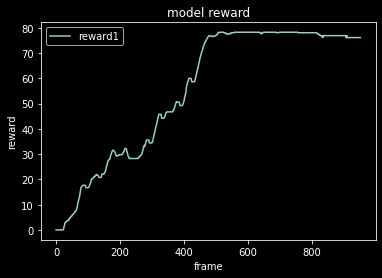

In [14]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

# summarize history for accuracy
#plt.plot(listchangerfloatforlist(data[GameName]["reward"][0][:600]))
plt.plot(listchangerfloatforlist(data[GameName]["reward"][0][:]))
#plt.plot(listchangerfloatforlist(data[GameName]["reward"][1][:680]))
plt.title('model reward')
plt.ylabel('reward')
plt.xlabel('frame')
plt.legend(['reward1','reward2','reward3'], loc='upper left')
plt.show()

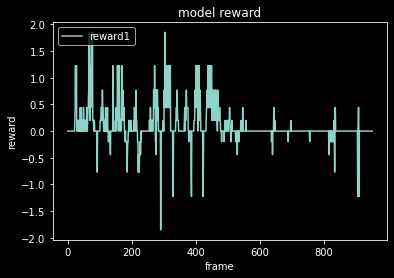

0.8403504779244442
[0.0, 1.22439690487027, 0.768946290395994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19941966317706086]


In [16]:
import matplotlib.pyplot as plt
lista = listchangerfloatforlist(data[GameName]["reward"][0][:])
deltas = [] 
for reward in range(len(lista)):
    if(reward < len(lista) - 1):
        if((lista[reward + 1] - lista[reward] < 1) and (lista[reward + 1] - lista[reward] > -1)):
            deltas.append((lista[reward + 1] - lista[reward]) * (1 + (lista[reward + 1] - lista[reward])*(lista[reward + 1] - lista[reward])))
        else:
            deltas.append(0)
        #deltas.append(lista[reward + 1] - lista[reward])


plt.style.use('dark_background')

# summarize history for accuracy
plt.plot(deltas[:])

plt.title('model reward')
plt.ylabel('reward')
plt.xlabel('frame')
plt.legend(['reward1','reward2','reward3'], loc='upper left')
plt.show()

sumi = 0
for dest in deltas[120:125]:
    sumi += dest
print(sumi )
print(deltas[140:150])

In [7]:
#returns experience that has good pontuation or has a delta increace bether than 0.7 the last best delta 

Experience_Path = "TensorSaves/Experiences/UserExperience/NewPerfectTrain.txt"

Head_Path = os.getcwd()
Head_Path = Head_Path.replace( Head_Path[2] , "/")

def experiencemaker2(experiencepath,actiontipe,GameName,lastcheckdeltas,observationdims = 0,Experience_Path = Experience_Path):
    data = {}
    if((os.path.exists("TensorSaves/Experiences/GoodExperienceBase/"+GameName+"/BaseRanges")) and (lastcheckdeltasobservationdims < 4)):
        with open("TensorSaves/Experiences/GoodExperienceBase/"+GameName+"/BaseRanges") as json_file:
            data = LibrariesImported["json"].load(json_file)
            json_file.close()
    else:
        Maxpontuation = 3000
        pontuationpool = 5
        pontuationrange = Maxpontuation/pontuationpool
        #list holds all deltas as [player[bestevol,bestpassdeltaincreasse],auto[bestevol,bestpassdeltaincreasse]]
        pontuationdeltas = []
        for pontuationindex in range(int(pontuationrange)):
            pontuationdeltas.append([[0,0],[0,0]])
        #reads user experience in path
        if(os.path.exists(Head_Path+"/"+Experience_Path)):
            with open(Head_Path+"/"+Experience_Path) as json_file:
                data = LibrariesImported["json"].load(json_file)
                json_file.close()
            for pontuationindex in range(int(pontuationrange)):
                for trainindex in range(len(data[GameName]["reward"])):
                    for frameindex in  range(len(data[GameName]["reward"][trainindex]) - 5 ):
                        if(listchangerfloat(data[GameName]["reward"][trainindex][frameindex]) > 30):
                            if((listchangerfloat(data[GameName]["reward"][trainindex][frameindex]) > pontuationindex * pontuationpool ) and (listchangerfloat(data[GameName]["reward"][trainindex][frameindex]) < (pontuationindex + 1) * pontuationpool)):
                                #get the bigest advance for this pontuation area
                                deltaframes = (listchangerfloat(data[GameName]["reward"][trainindex][frameindex + 1]) - listchangerfloat(data[GameName]["reward"][trainindex][frameindex]))
                                for frontframeindexsum in range(4):
                                    deltaframes += (listchangerfloat(data[GameName]["reward"][trainindex][frameindex + (2 + frontframeindexsum )]) - listchangerfloat(data[GameName]["reward"][trainindex][frameindex + (1 + frontframeindexsum)]))
                                deltaframes = deltaframes/5
                                distancetraveled = (listchangerfloat(data[GameName]["reward"][trainindex][frameindex + 5]) - listchangerfloat(data[GameName]["reward"][trainindex][frameindex]))
                                if(distancetraveled > pontuationdeltas[pontuationindex][0][0]):
                                    pontuationdeltas[pontuationindex][0][0] = distancetraveled
                                if(deltaframes > pontuationdeltas[pontuationindex][0][1]):  
                                    pontuationdeltas[pontuationindex][0][1] = deltaframes
                                print(pontuationdeltas)
experiencemaker2(0,0,"Crash",6)
print("end")

[0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]], [

In [ ]:
#returns labels and images from a file after passing them from a reinforce filter only the ones that decreaces score loss and that increasses score are read 
def experiencemaker(experiencepath,actiontipe,observationdims = 0): 
    with open(Head_Path+"/"+experiencepath) as json_file:
        data =  LibrariesImported["json"].load(json_file)
        json_file.close()
    filteredlabels = []
    filteredimages = []
    for trainindex in range(len(data[GameName]["reward"])):
        lastreward = 0
        deltareward = 0
        lastdeltareward = 0
        for frameindex in  range(len(data[GameName]["reward"][trainindex])):
            deltareward = listchangerfloat(data[GameName]["reward"][trainindex][frameindex]) - lastdeltareward
            if((deltareward > 0) or (deltareward > lastdeltareward)):
                if(actiontipe == "Serialized8"):
                    print(data[GameName]["action"][trainindex][frameindex])
                    filteredlabels.append( XimputSerializerUint8(data[GameName]["action"][trainindex][frameindex]))
                if(actiontipe == "Serialized83"):
                    filteredlabels.append( XimputSerializerUint83(data[GameName]["action"][trainindex][frameindex]))
                elif(actiontipe == "15array"):
                    filteredlabels.append(data[GameName]["action"][trainindex][frameindex])
                if(observationdims == 0):
                    filteredimages.append(data[GameName]["observation"][trainindex][frameindex])
                elif(observationdims == -1):
                    filteredimages.append( LibrariesImported["numpy"].expand_dims(data[GameName]["observation"][trainindex][frameindex], axis=-1))
            lastreward = listchangerfloat(data[GameName]["reward"][trainindex][frameindex])
            lastdeltareward = deltareward
    filteredimages = LibrariesImported["numpy"].array(filteredimages)
    filteredlabels = LibrariesImported["numpy"].array(filteredlabels)
    print(filteredimages.shape)
    print(filteredlabels.shape)
    return filteredlabels,filteredimages

In [ ]:
#returns experience that has good pontuation or has a delta increace bether than 0.7 the last best delta 

Experience_Path = "TensorSaves/Experiences/UserExperience/NewPerfectTrain.txt"

def experiencemaker2(experiencepath,actiontipe,observationdims = 0):
    filteredlabels = []
    filteredimages = []
    rewardstepdist = 5
    Reference = PBestscore.copy()
    movingdeltareward =  PBestscore[0]
    i = 0
    while(i<listchangerfloat(reference)):
         i += 1
         if(reference[1] > (1000 * i)):
             movingdeltareward += 100
    ReferenceDelta = movingdeltareward / 900
    with open(Head_Path+"/"+experiencepath) as json_file:
        data =  LibrariesImported["json"].load(json_file)
        json_file.close()
    for trainindex in range(len(data[GameName]["reward"])):
        lastreward = 0
        lastrewardstep = 0
        deltareward = 0
        lastdeltareward = 0
        for frameindex in  range(len(data[GameName]["reward"][trainindex])):
            if(frameindex + rewardstepdist < len(data[GameName]["reward"][trainindex])):
                deltastep = (data[GameName]["reward"][trainindex][frameindex+5] - data[GameName]["reward"][trainindex][frameindex]) / rewardstepdist
                if(deltastep > ReferenceDelta):
                    if(actiontipe == "Serialized8"):
                        for stepframes in range(rewardstepdist):
                            filteredlabels.append( XimputSerializerUint8(data[GameName]["action"][trainindex][frameindex + stepframes]))
                    if(actiontipe == "Serialized83"):
                        for stepframes in range(rewardstepdist):
                            filteredlabels.append( XimputSerializerUint83(data[GameName]["action"][trainindex][frameindex + stepframes]))
                    elif(actiontipe == "15array"):
                        for stepframes in range(rewardstepdist):
                            filteredlabels.append(data[GameName]["action"][trainindex][frameindex + stepframes])
                    if(observationdims == 0):
                        for stepframes in range(rewardstepdist):
                            filteredimages.append(data[GameName]["observation"][trainindex][frameindex + stepframes])
                    elif(observationdims == -1):
                        for stepframes in range(rewardstepdist):
                            filteredimages.append( LibrariesImported["numpy"].expand_dims(data[GameName]["observation"][trainindex][frameindex + stepframes], axis=-1))
                elevateddelta = 0
                for stepframes in range(rewardstepdist):
                    delt = (data[GameName]["reward"][trainindex][frameindex + 1] - data[GameName]["reward"][trainindex][frameindex])
                    elevateddelta += (delt * (1 + (delt * delt)))
                if(elevateddelta > 1):
                    if(actiontipe == "Serialized8"):
                        for stepframes in range(rewardstepdist):
                            filteredlabels.append( XimputSerializerUint8(data[GameName]["action"][trainindex][frameindex + stepframes]))
                    if(actiontipe == "Serialized3"):
                        for stepframes in range(rewardstepdist):
                            filteredlabels.append( XimputSerializerUint3(data[GameName]["action"][trainindex][frameindex + stepframes]))
                    elif(actiontipe == "15array"):
                        for stepframes in range(rewardstepdist):
                            filteredlabels.append(data[GameName]["action"][trainindex][frameindex + stepframes])
                    if(observationdims == 0):
                        for stepframes in range(rewardstepdist):
                            filteredimages.append(data[GameName]["observation"][trainindex][frameindex + stepframes])
                    elif(observationdims == -1):
                        for stepframes in range(rewardstepdist):
                            filteredimages.append( LibrariesImported["numpy"].expand_dims(data[GameName]["observation"][trainindex][frameindex + stepframes], axis=-1))
    filteredimages = LibrariesImported["numpy"].array(filteredimages)
    filteredlabels = LibrariesImported["numpy"].array(filteredlabels)
    print(filteredimages.shape)
    print(filteredlabels.shape)
    return filteredlabels,filteredimages
